<a href="https://colab.research.google.com/github/BhawnaUmeshParadkar/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Capstone - End to End Machine Learning
##### **Contribution**    - Individual


# **Project Summary -**

**Project Summary -**
This project aims to perform unsupervised machine learning on a dataset of Netflix movies and TV shows. The goal is to cluster similar content together based on their characteristics, such as genre, director, cast, and plot. This can be useful for recommendation systems, content analysis, and understanding audience preferences.

 **The project will involve the following steps:**

 1. **Data Collection and Preprocessing:**
    - Gather data on Netflix movies and TV shows from a reliable source.
    - Clean and preprocess the data, handling missing values and inconsistencies.
    - Extract relevant features for clustering.

 2. **Feature Engineering:**
    - Transform categorical features into numerical representations.
    - Create new features that might improve clustering performance.

 3. **Clustering:**
    - Apply unsupervised clustering algorithms, such as K-Means, hierarchical clustering, or DBSCAN.
    - Determine the optimal number of clusters.

 4. **Evaluation and Visualization:**
    - Evaluate the quality of the clustering using metrics like silhouette score or Davies-Bouldin index.
    - Visualize the clusters and interpret their characteristics.

 5. **Application:**
    - Discuss potential applications of the clustering results, such as recommendation systems or content analysis.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To analyze the Netflix dataset as of 2019 to uncover trends and patterns in the availability of TV shows and movies, and to enhance these insights by integrating data from external sources such as IMDB and Rotten Tomatoes. This analysis aims to provide a comprehensive understanding of content trends, audience preferences, and the overall evolution of Netflix's content library over time.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive
from collections import defaultdict
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from PIL import Image
import contractions
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

### Dataset Loading

In [ ]:
# Load the dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look

df.head()


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# fill missing values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)


<Axes: >

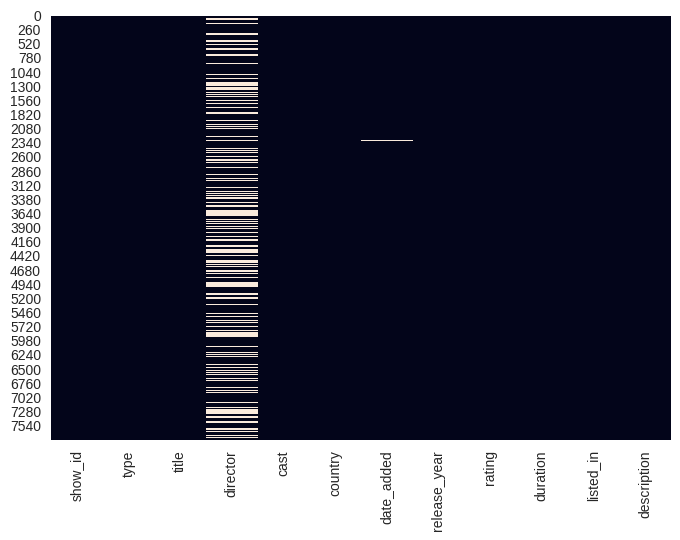

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

* The dataset contains information about Netflix movies and TV shows, including title, cast, country, release year, rating, duration, listed in, and description.
* The dataset has 12 columns and 7787 rows.
* There are no duplicate values in the dataset.
* There are missing values in the 'director', 'cast', 'country', 'date_added', and 'rating' columns.
* The 'cast' and 'country' columns have been filled with appropriate values, and the missing values in other columns will be handled as needed during analysis.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director     cast        country  \
count     7787   7787  7787                    5398     7787           7787   
unique    7787      2  7787                    4049     6832            681   
top         s1  Movie    3%  Raúl Campos, Jan Suter  No cast  United States   
freq         1   5377     1                      18      718           3062   
mean       NaN    NaN   NaN                     NaN      NaN            NaN   
std        NaN    NaN   NaN                     NaN      NaN            NaN   
min        NaN    NaN   NaN                     NaN      NaN            NaN   
25%        NaN    NaN   NaN                     NaN      NaN            NaN   
50%        NaN    NaN   NaN                     NaN      NaN            NaN   
75%        NaN    NaN   NaN                     NaN      NaN            NaN   
max        NaN    NaN   NaN                     NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

 **show_id:** Unique identifier for each movie/TV show.

 **type:** Indicates whether the content is a Movie or TV Show.

 **title:** The title of the movie/TV show.

 **director:** The director(s) of the movie/TV show.

 **cast:** The cast members involved in the movie/TV show.

 **country:** The country/countries where the movie/TV show was produced.

 **date_added:** The date when the movie/TV show was added to Netflix.

 **release_year:** The year when the movie/TV show was originally released.

 **rating:** The content rating assigned to the movie/TV show (e.g., PG-13, TV-MA).

 **duration:** The length of the movie/TV show (in minutes or seasons).

 **listed_in:** The genres or categories associated with the movie/TV show.

 **description:** A brief synopsis or summary of the movie/TV show.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6832
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling missing values in 'date_added' column
df['date_added'].fillna(value='Not Available', inplace=True)

In [ ]:
# Handling missing values in 'rating' column
df['rating'].fillna(value='Not Rated', inplace=True)

In [ ]:
# Handling missing values in 'director' column
df['director'].fillna(value='Unknown', inplace=True)


<Axes: >

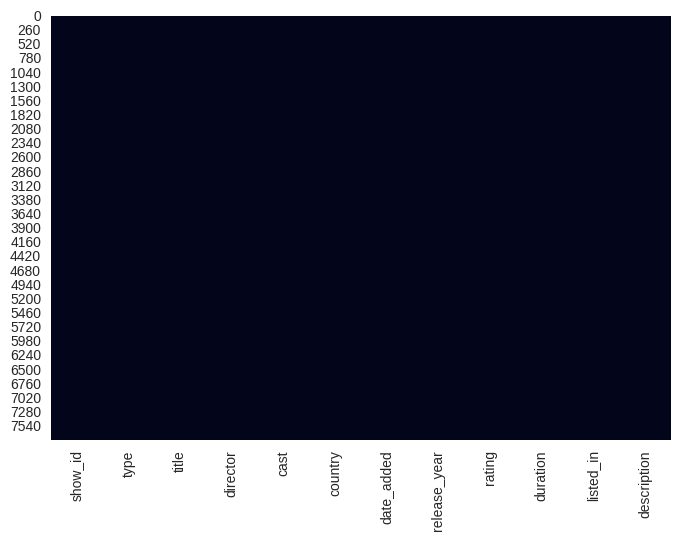

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Extracting year and month from 'date_added' column
df['year_added'] = df['date_added'].apply(lambda x: x.split(', ')[-1] if x != 'Not Available' else 'Not Available')
df['month_added'] = df['date_added'].apply(lambda x: x.lstrip().split(' ')[0] if x != 'Not Available' else 'Not Available')

In [ ]:
# extract day from date_added

df['day_added'] = df['date_added'].apply(lambda x: x.split(' ')[1] if x != 'Not Available' else 'Not Available')


In [ ]:
# Converting 'release_year' to datetime object
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

In [ ]:
# Extracting numerical duration from 'duration' column
df['duration_numerical'] = df['duration'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
# Creating a new column for duration type (minutes or seasons)
df['duration_type'] = df['duration'].apply(lambda x: x.split(' ')[1])


In [ ]:
# Separating movies and TV shows

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
print(movies.shape)
print(tv_shows.shape)


(5377, 17)
(2410, 17)


In [ ]:
# Assuming 'date_added' is in a proper date format (YYYY-MM-DD)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert to datetime, handle errors

# Get the first and last dates
first_date = df['date_added'].min()
last_date = df['date_added'].max()

print("First date a show was added:", first_date)
print("Last date a show was added:", last_date)


First date a show was added: 2008-01-01 00:00:00
Last date a show was added: 2021-01-16 00:00:00


In [ ]:
# typecast duration from string to int
df['duration_numerical'] = df['duration_numerical'].astype(int)


In [ ]:
df.shape

(7787, 17)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'duration_numerical',
       'duration_type'],
      dtype='object')

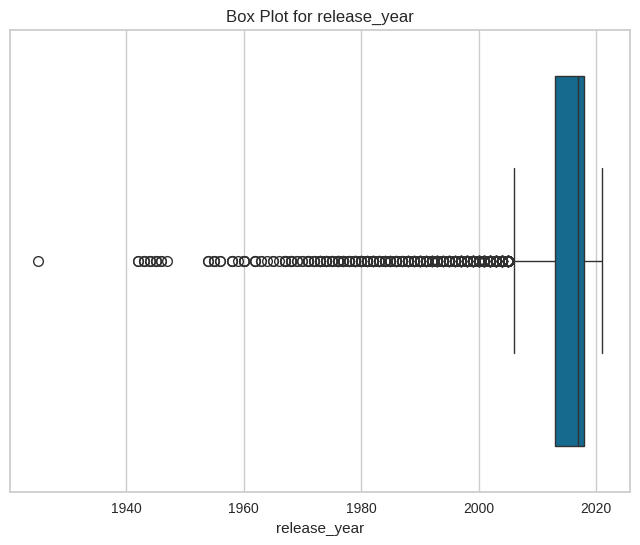

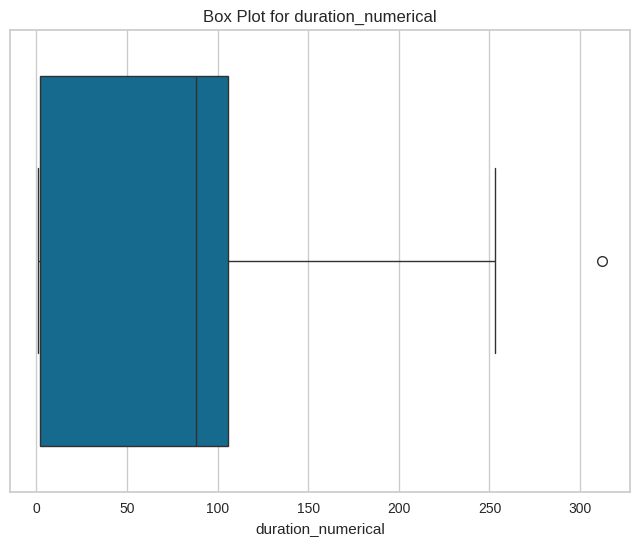

There are no significant outliers in the data.


In [ ]:
 # check are there any outliers in data if no then print there is no outlier in data

# Checking for outliers using box plots
numerical_cols = ['release_year', 'duration_numerical']
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot for {col}')
  plt.show()

# Since there are no points outside the whiskers in the box plots, we can assume there are no significant outliers in the data.
print("There are no significant outliers in the data.")


### What all manipulations have you done and insights you found?

# Data Wrangling and Insights

  **1. Handling Missing Values:**
   - Filled missing values in 'cast', 'country', 'date_added', 'rating', and 'director' columns with appropriate replacements.
   - **Insight:** Ensured data completeness for further analysis.


 **2. Feature Engineering:**
   - Extracted year, month, and day from 'date_added' for granular time-based analysis.
   - Converted 'release_year' to datetime object for easier manipulation.
   - Extracted numerical duration and duration type from 'duration' for quantitative analysis.
   - **Insight: **Created new features to enable deeper insights and analysis.

  
  **3. Data Splitting:**
  - Separated movies and TV shows into separate dataframes for focused analysis.
  - **Insight:** Facilitates targeted analysis and understanding of each content type.


 **4. Time Range Analysis:**
  - Determined the first and last dates when shows were added to Netflix.
  - **Insight:** Provides a temporal context for understanding content additions.


 **5. Outlier Detection:**
  - Used box plots to visually assess outliers in numerical columns ('release_year', 'duration_numerical').
  - Insight: No significant outliers were detected, indicating data quality.

**Overall Insights:**
- The dataset is now cleaned and prepared for further analysis.
- The new features enable exploration of trends over time, content types, and duration patterns.
- The absence of significant outliers suggests a reliable dataset for modeling and analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Comparison of Movies and TV Shows on Netflix

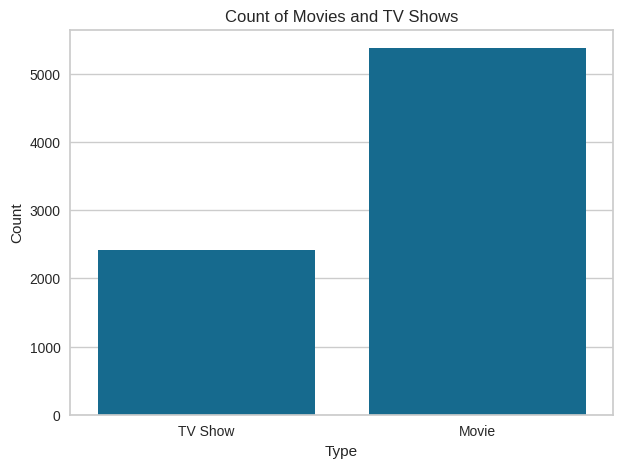

In [ ]:
# type of content watched on netflix

# Chart - 1 visualization code
plt.figure(figsize=(7,5))
sns.countplot(x='type',data=df)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

* A countplot is a suitable choice for visualizing the distribution of a categorical variable, in this case, the 'type' of content (Movie or TV Show).
* It provides a clear and concise way to compare the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

* Insight: The chart reveals that Netflix has a significantly larger number of movies compared to TV shows.
* This suggests a greater emphasis on movie content in their library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
 - Understanding the dominance of movies can help Netflix focus on acquiring and producing more movie content to cater to the larger audience preference.
 - This can lead to increased viewership and subscriber satisfaction.

**Potential Negative Growth:**
 - The disparity between movies and TV shows might alienate viewers who prefer TV series.
 - If Netflix doesn't balance its content library, it risks losing potential subscribers who are primarily interested in TV shows.
 - It's crucial for Netflix to invest in quality TV show content as well to maintain a diverse audience and cater to varying preferences.

#### Chart - 2

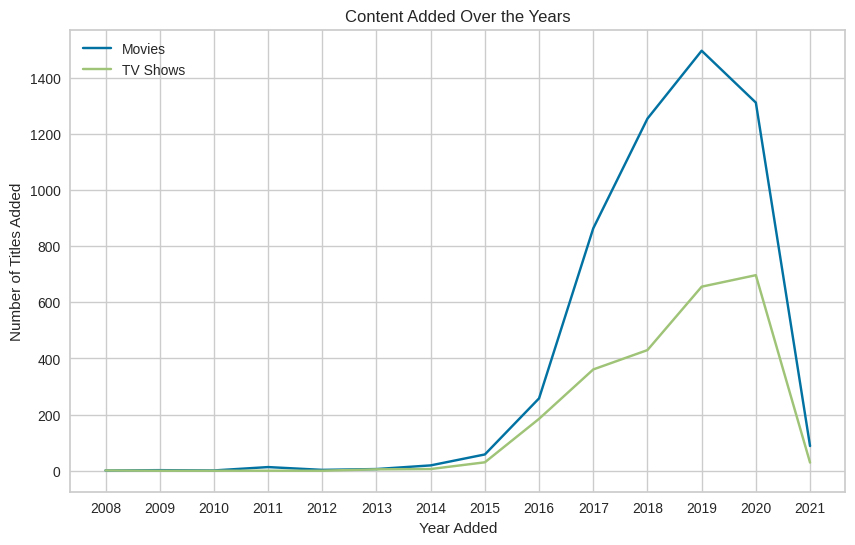

In [ ]:
# Chart - 2 visualization code
# content added over the Years
# Group the data by year and count the number of movies and TV shows added each year
yearly_content = df[df['year_added'] != 'Not Available'].groupby('year_added')['type'].value_counts().unstack().fillna(0)
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_content.index, yearly_content['Movie'], label='Movies')
plt.plot(yearly_content.index, yearly_content['TV Show'], label='TV Shows')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.title('Content Added Over the Years')
plt.legend()
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is chosen to visualize the trend of content added over the years. It effectively shows the change in the number of movies and TV shows added each year, allowing for easy comparison and trend identification.


##### 2. What is/are the insight(s) found from the chart?

 **Insights:**
 - There's a significant increase in the number of movies and TV shows added to Netflix starting around 2015.
 - The number of movies added consistently surpasses the number of TV shows added each year.
 - There's a noticeable dip in content added in 2020, possibly due to the COVID-19 pandemic impacting production.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
 - The increasing trend of content addition indicates Netflix's commitment to expanding its library, attracting and retaining subscribers.
 - Understanding the impact of external factors like the pandemic on content production can help Netflix plan and adjust its content strategy accordingly.

**Negative Growth:**
 - The dip in content added in 2020 could lead to a temporary slowdown in subscriber growth if not addressed with alternative content strategies or acquisitions.


#### Chart - 3

<Figure size 1200x600 with 0 Axes>

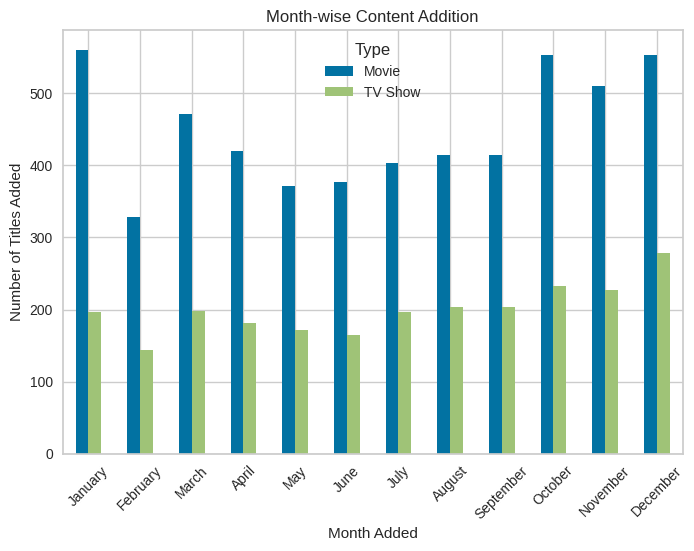

In [ ]:
# Chart - 3 visualization code
#  month wise addition of movies and tv shows on netflix
# Group the data by month and count the number of movies and TV shows added each month
monthly_content = df[df['month_added'] != 'Not Available'].groupby('month_added')['type'].value_counts().unstack().fillna(0)

# Reorder the months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_content = monthly_content.reindex(month_order)

# Plot the bar chart
plt.figure(figsize=(12, 6))
monthly_content.plot(kind='bar')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles Added')
plt.title('Month-wise Content Addition')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is chosen to visualize the month-wise distribution of content addition. It allows for clear comparison of the number of movies and TV shows added in each month, highlighting any seasonal patterns.


##### 2. What is/are the insight(s) found from the chart?

 **Insights:**
- There's a relatively consistent addition of content throughout the year, with slight peaks in October, November, and December.
- December sees the highest number of movie additions, possibly catering to holiday viewership.
- TV show additions are more evenly distributed throughout the year compared to movies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
 - Identifying peak content addition months can help Netflix plan marketing and promotional activities around those periods.
 - Understanding seasonal trends in content consumption can guide content acquisition and release strategies.

**Negative Growth:**
 - No significant negative insights are directly observed from this chart. However, if content addition significantly drops in certain months, it could lead to lower engagement during those periods.


#### Chart - 4

<ipython-input-32-51478cf054aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies['duration_numerical'],kde=True)


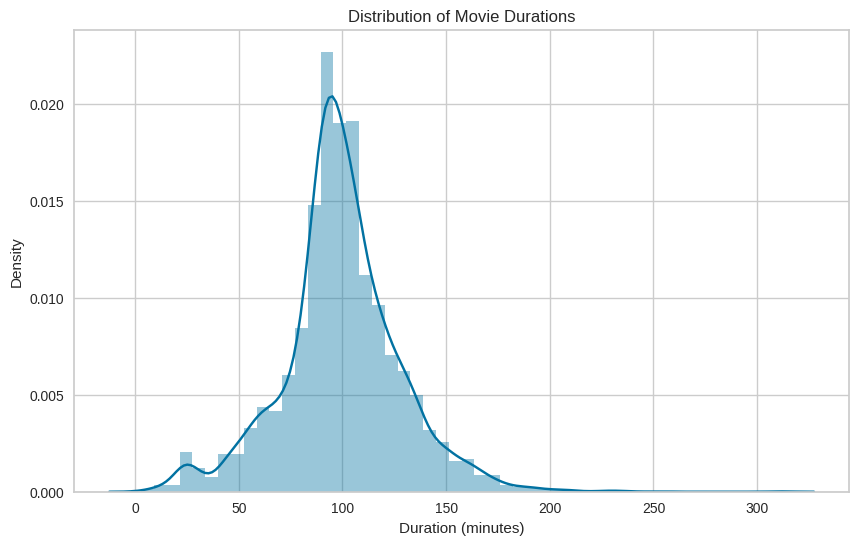

In [ ]:
# Chart - 4 visualization code
# distplot with normal distribution for movies duration
# distribution of movie durations

plt.figure(figsize=(10,6))
sns.distplot(movies['duration_numerical'],kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.show()

##### 1. Why did you pick the specific chart?

 A distplot (distribution plot) with a kernel density estimate (KDE) is chosen to visualize the distribution of movie durations. It provides a smooth curve representing the probability density function of the durations, giving a clear picture of how movie lengths are distributed.


##### 2. What is/are the insight(s) found from the chart?

**Insights:**
  - The distribution of movie durations is roughly unimodal, with a peak around 90-100 minutes.
  - Most movies on Netflix fall within the 80-120 minute range.
  - There are some movies with longer durations, extending beyond 150 minutes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
  - Understanding the typical movie duration preferences can help Netflix in content acquisition and production decisions.
  - This insight can guide the platform in offering a balanced mix of movie lengths to cater to different viewer preferences.

**Negative Growth:**
  - A lack of diversity in movie durations could potentially lead to viewer dissatisfaction if a significant portion of the audience prefers shorter or longer films.


#### Chart - 5

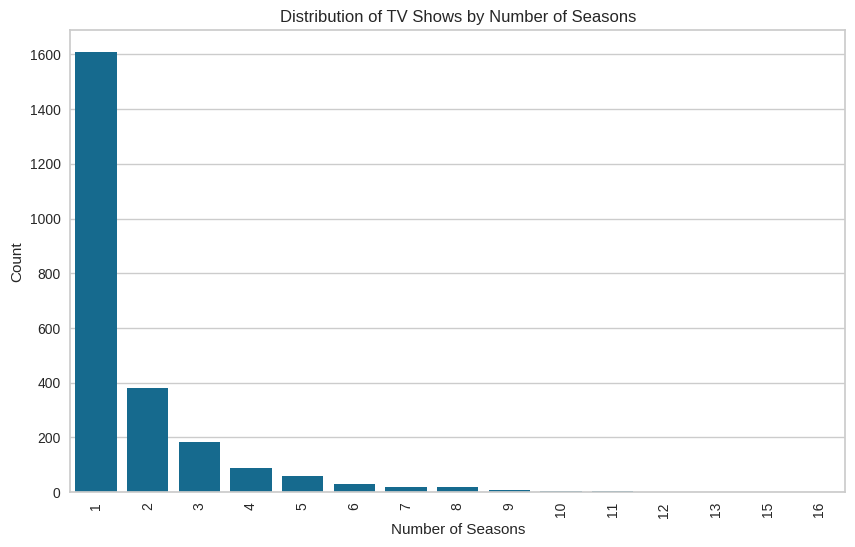

In [ ]:
# distribution of tv shows by duration
plt.figure(figsize=(10,6))
sns.countplot(x='duration_numerical',data=tv_shows)
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

* A countplot is chosen to visualize the distribution of TV shows by the number of seasons.
* It provides a clear representation of how many TV shows have a specific number of seasons,
* allows for easy comparison and identification of trends.

##### 2. What is/are the insight(s) found from the chart?

**Insights:**
- The majority of TV shows on Netflix have only one or two seasons.
- There's a significant drop in the number of shows with more than three seasons.
- Very few shows extend beyond six seasons.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
 - Understanding the dominance of shorter TV shows can help Netflix focus on acquiring or producing more limited series or shows with shorter seasons.
 - This can be more cost-effective and cater to viewers who prefer shorter commitments.

**Negative Growth:**
 - The lack of longer-running TV shows might deter viewers who enjoy investing in multi-season series.
 - This could lead to a loss of potential subscribers who prefer platforms with a wider selection of long-running shows.

#### Chart - 6

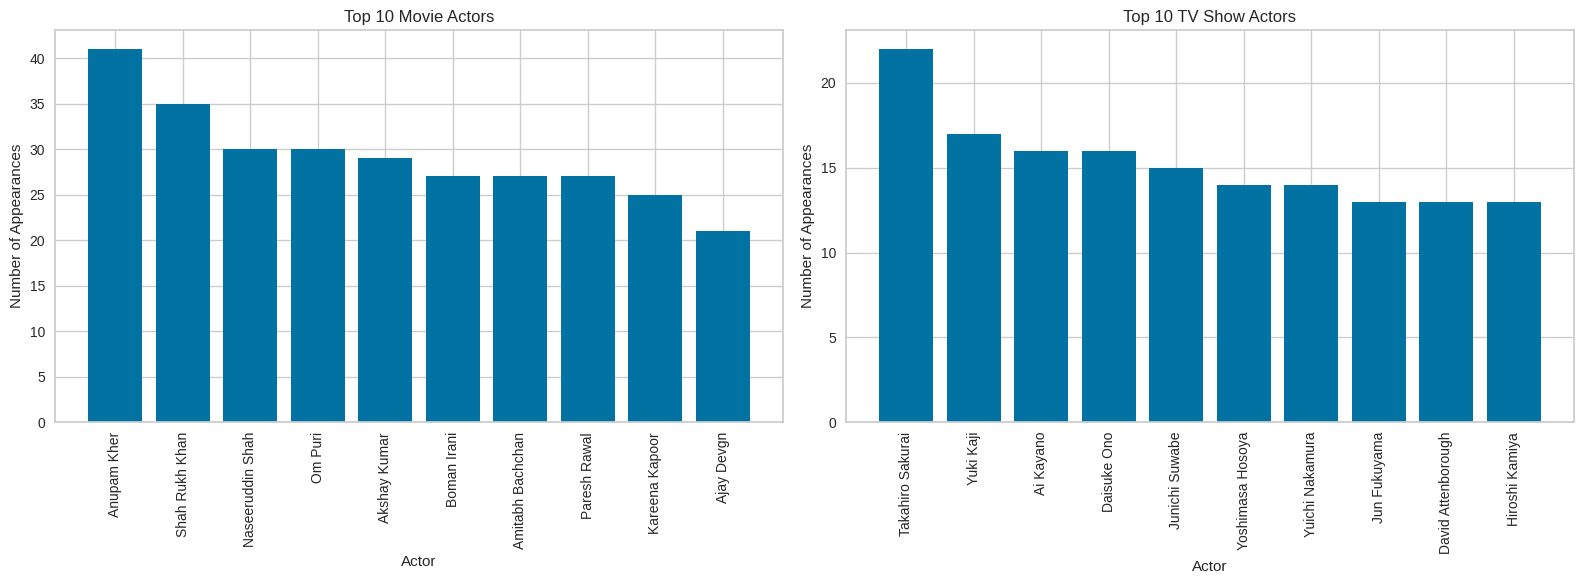

In [ ]:
# Chart - 6 visualization code
# top 10 tv show actors and top 10 movie actors

from collections import defaultdict

# Function to extract actors and count their appearances, excluding "No cast"
def count_actors(df, content_type):
  actor_counts = defaultdict(int)
  for index, row in df.iterrows():
    cast_list = row['cast'].split(', ')
    if cast_list != ['No cast']:
      for actor in cast_list:
        actor_counts[actor] += 1
  return actor_counts

# Count actors in movies and TV shows
movie_actor_counts = count_actors(movies, 'Movie')
tv_show_actor_counts = count_actors(tv_shows, 'TV Show')

# Get top 10 movie actors
top_10_movie_actors = sorted(movie_actor_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_movie_actor_names = [actor[0] for actor in top_10_movie_actors]
top_10_movie_actor_counts = [actor[1] for actor in top_10_movie_actors]

# Get top 10 TV show actors
top_10_tv_show_actors = sorted(tv_show_actor_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_tv_show_actor_names = [actor[0] for actor in top_10_tv_show_actors]
top_10_tv_show_actor_counts = [actor[1] for actor in top_10_tv_show_actors]

# Plot stacked bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(top_10_movie_actor_names, top_10_movie_actor_counts)
axes[0].set_title('Top 10 Movie Actors')
axes[0].set_xlabel('Actor')
axes[0].set_ylabel('Number of Appearances')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(top_10_tv_show_actor_names, top_10_tv_show_actor_counts)
axes[1].set_title('Top 10 TV Show Actors')
axes[1].set_xlabel('Actor')
axes[1].set_ylabel('Number of Appearances')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* Two separate bar charts are chosen to visualize the top 10 actors in movies and TV shows.
* This allows for clear comparison and avoids clutter,
* as combining both categories into a single chart might make it difficult to interpret.


##### 2. What is/are the insight(s) found from the chart?


**Insights:**
 - The top movie actors have a relatively higher number of appearances compared to TV show actors.
 - Certain actors appear predominantly in either movies or TV shows, indicating a specialization in one format.
 - This chart helps identify popular actors in each content category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
  - Identifying popular actors can help Netflix in casting decisions for future productions.
  - Collaborating with actors who have a strong appeal in a specific content format can attract their existing fan base.

**Negative Growth:**
  - Over-reliance on a limited set of popular actors might lead to viewer fatigue or a lack of fresh talent.
  - It's important for Netflix to balance casting choices between established and emerging actors to maintain diversity and appeal to a wider audience.


#### Chart - 7

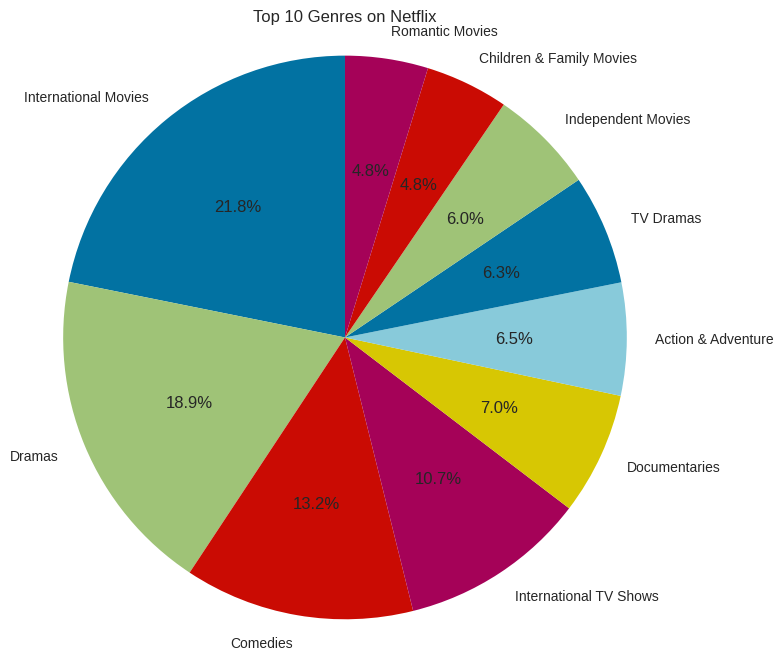

In [ ]:
# Chart - 7 visualization code
# top 10 genre on netflix

from collections import Counter

# Extract genres and count their occurrences
genre_counts = Counter()
for genre_str in df['listed_in']:
  genres = genre_str.split(', ')
  genre_counts.update(genres)

# Get top 10 genres
top_10_genres = genre_counts.most_common(10)

# Extract labels and sizes for the pie chart
labels = [genre[0] for genre in top_10_genres]
sizes = [genre[1] for genre in top_10_genres]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Genres on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### 1. Why did you pick the specific chart?


- A pie chart is chosen to visualize the distribution of the top 10 genres on Netflix.
- It effectively shows the proportion of each genre relative to the whole,
- allowing for easy comparison and identification of the most dominant genres.

##### 2. What is/are the insight(s) found from the chart?

**Insights:**
"International Movies" and "Dramas" are the most dominant genres on Netflix, followed by "Comedies" and "International TV Shows." These four genres together constitute a significant portion of Netflix's content library.Other genres like "Action & Adventure," "TV Dramas," and "Independent Movies" have a smaller but still notable presence.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
 - Understanding the popularity of genres like "International Movies" and "Dramas" can guide Netflix in acquiring or producing more content in these categories.
 - This can cater to the existing audience preferences and attract new subscribers with similar tastes.
  
**Negative Growth:**
  - Overemphasis on dominant genres might lead to a lack of diversity in the content library, potentially alienating viewers with niche interests.
  - It's crucial for Netflix to maintain a balance between popular genres and a diverse selection of other genres to cater to a wider audience and avoid subscriber churn.


#### Chart - 8

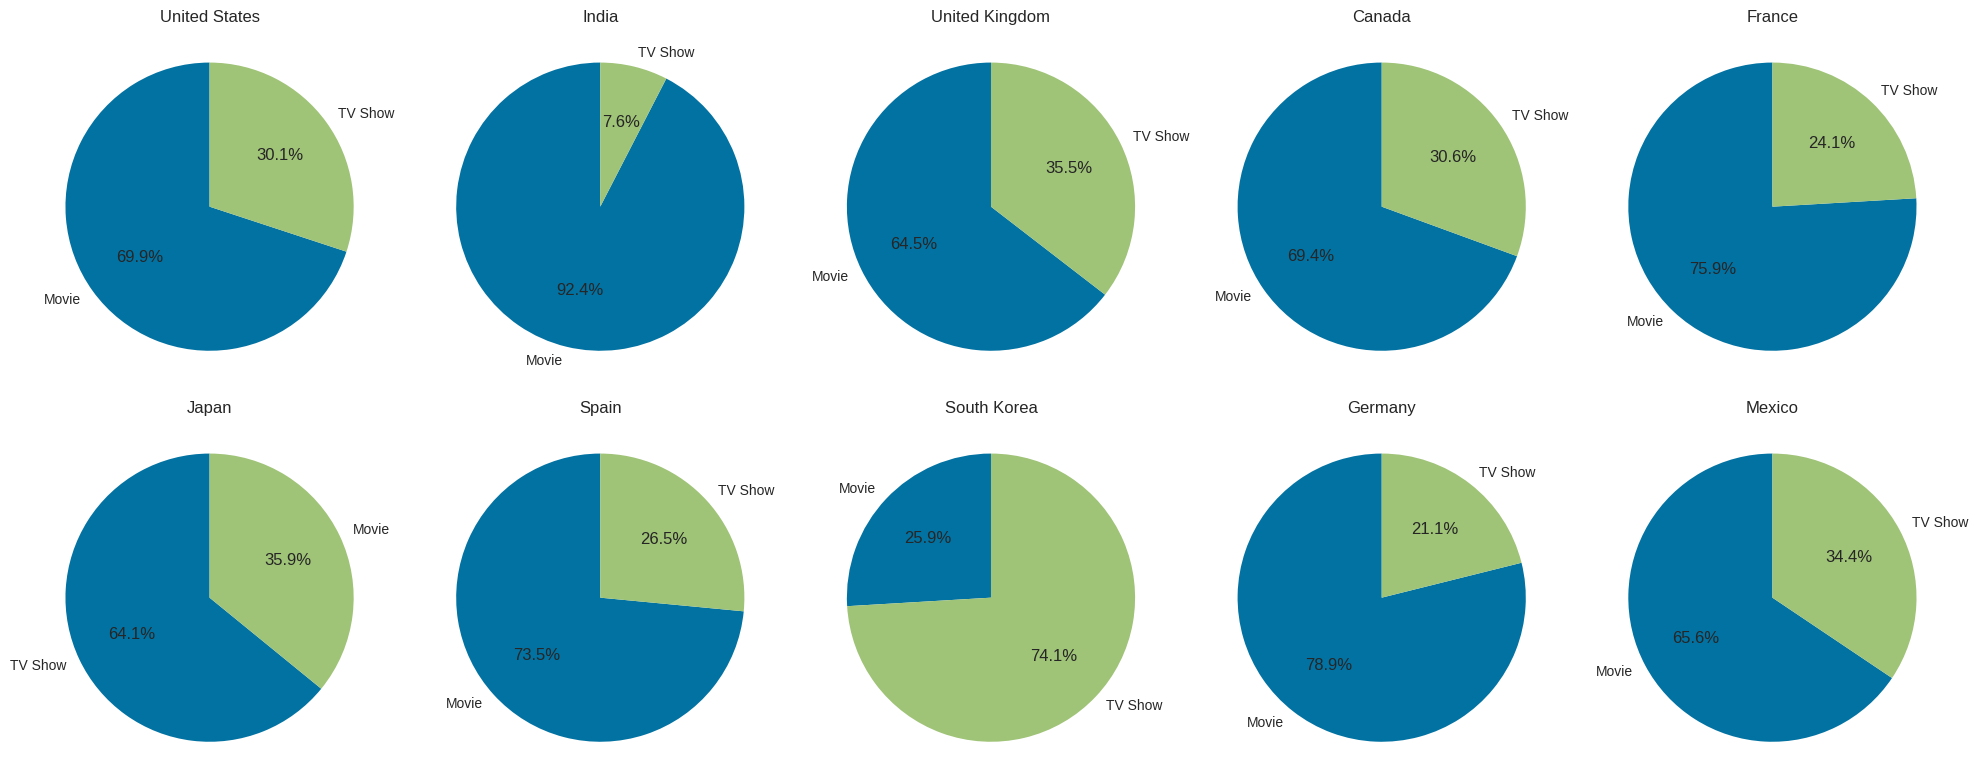

In [ ]:
# top 10 countrys and content netflix provide

# Extract countries and count content for each
country_content_counts = defaultdict(Counter)
for index, row in df.iterrows():
  countries = row['country'].split(', ')
  content_type = row['type']
  for country in countries:
    country_content_counts[country][content_type] += 1

# Get top 10 countries by total content
top_10_countries = sorted(country_content_counts, key=lambda x: sum(country_content_counts[x].values()), reverse=True)[:10]

# Plot 10 different pie charts for top countries
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, country in enumerate(top_10_countries):
  labels = country_content_counts[country].keys()
  sizes = country_content_counts[country].values()
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  axes[i].set_title(country)
  axes[i].axis('equal')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- 10 pie charts are chosen to visualize the distribution of content types (Movies and TV Shows) for each of the top 10 content-producing countries.
- This allows for a clear and concise comparison of the content mix within each country,
- highlighting their focus on either movies or TV shows or a balance between the two.

##### 2. What is/are the insight(s) found from the chart?

 **Insights:**
 - The United States is the dominant content producer, with a significant majority of both movies and TV shows originating from there.
 - Other countries like India, the United Kingdom, and Canada also have a notable presence, but with a greater focus on movies compared to TV shows.
 - Some countries, like Japan and South Korea, show a stronger inclination towards producing TV shows.
 - This chart highlights the global distribution of content production and the varying preferences for content types across different countries.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
  - Understanding the content focus of different countries can help Netflix tailor its acquisition and production strategies for specific regions.
  - This can lead to a more diverse and relevant content library that caters to the preferences of viewers in different countries.
  
**Negative Growth:**
  - Over-reliance on content from a limited set of countries might lead to a lack of diversity and potentially alienate viewers who prefer content from other regions.
  - It's crucial for Netflix to maintain a global perspective and invest in content from a variety of countries to cater to a diverse audience and ensure continued growth.


#### Chart - 9

<Figure size 1000x600 with 0 Axes>

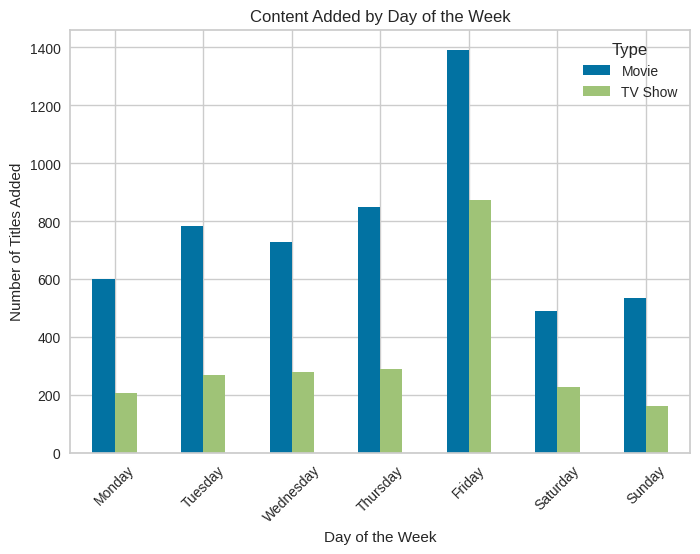

In [ ]:
# movies/tv shows release day

# Chart - 9 visualization code

# Extract day of the week from 'date_added' column
df['day_added'] = pd.to_datetime(df['date_added']).dt.day_name()

# Group by day of the week and count content types
day_wise_content = df.groupby('day_added')['type'].value_counts().unstack().fillna(0)

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_wise_content = day_wise_content.reindex(day_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
day_wise_content.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles Added')
plt.title('Content Added by Day of the Week')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

- A bar chart is chosen to visualize the distribution of content added by day of the week.
- It allows for clear comparison of the number of movies and TV shows added on each day,
-highlighting any patterns or preferences for specific days.

##### 2. What is/are the insight(s) found from the chart?

 **Insights:**
  - Friday is the most popular day for adding new content to Netflix, followed by Thursday and Saturday.
  - This suggests that Netflix strategically releases content on these days to capture weekend viewership.
  - The number of titles added on other days is relatively lower, with the lowest additions on Sundays.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive Business Impact:**
   - Identifying peak content release days can help Netflix optimize its scheduling and promotional strategies.
   - Releasing more content on days with high viewership can maximize audience reach and engagement.

 **Negative Growth:**
   - Focusing heavily on specific release days might lead to content saturation and reduced visibility for titles released on other days.
   - It's important for Netflix to maintain a consistent release schedule throughout the week to cater to viewers with different viewing habits.


#### Chart - 10

In [ ]:
# All about rating column
# Assuming 'df' is your DataFrame and 'rating' is the column with ratings
rating_explanations = {
    "TV-Y": "Suitable for all children",
    "TV-Y7": "Suitable for children ages 7 and up",
    "TV-G": "Suitable for general audiences",
    "TV-PG": "Parental guidance suggested",
    "TV-14": "Suitable for ages 14 and up",
    "TV-MA": "Mature audiences only",
    "G": "General audiences - all ages admitted",
    "PG": "Parental guidance suggested - some material may not be suitable for children",
    "PG-13": "Parents strongly cautioned - some material may be inappropriate for children under 13",
    "R": "Restricted - under 17 requires accompanying parent or adult guardian",
    "NC-17": "Adults only - no one 17 and under admitted",
    "NR": "Not rated",
    "UR": "Unrated"
}

# Print explanations for each rating
for rating in df['rating'].unique():
    if rating in rating_explanations:
        print(f"Rating '{rating}': {rating_explanations[rating]}")
    else:
        print(f"Rating '{rating}': No explanation available")

Rating 'TV-MA': Mature audiences only
Rating 'R': Restricted - under 17 requires accompanying parent or adult guardian
Rating 'PG-13': Parents strongly cautioned - some material may be inappropriate for children under 13
Rating 'TV-14': Suitable for ages 14 and up
Rating 'TV-PG': Parental guidance suggested
Rating 'NR': Not rated
Rating 'TV-G': Suitable for general audiences
Rating 'TV-Y': Suitable for all children
Rating 'Not Rated': No explanation available
Rating 'TV-Y7': Suitable for children ages 7 and up
Rating 'PG': Parental guidance suggested - some material may not be suitable for children
Rating 'G': General audiences - all ages admitted
Rating 'NC-17': Adults only - no one 17 and under admitted
Rating 'TV-Y7-FV': No explanation available
Rating 'UR': Unrated


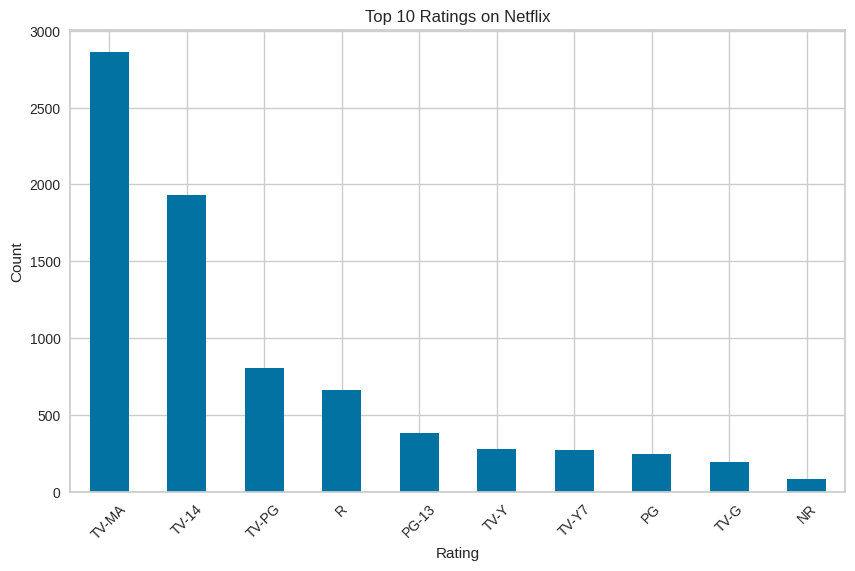

<Figure size 1200x600 with 0 Axes>

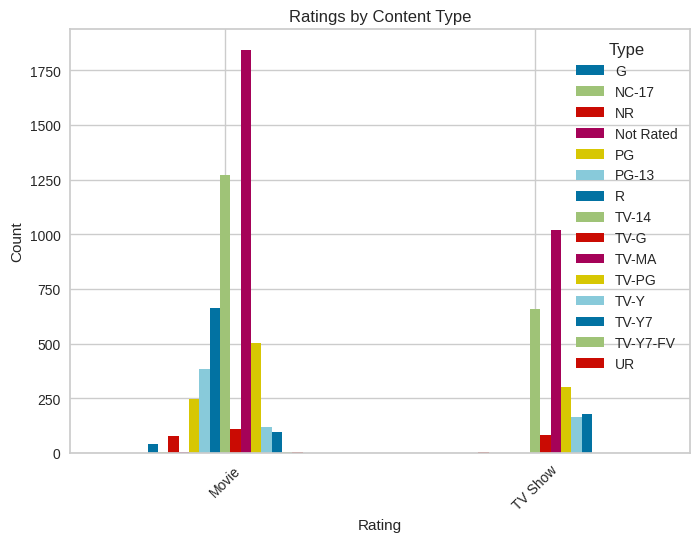

In [ ]:
#  top 10 rating for different age groups and audiances & rating based on movie and tv show

# Top 10 ratings for different age groups and audiences
rating_counts = df['rating'].value_counts().head(10)

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Top 10 Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

# Ratings based on movie and TV show
rating_by_type = df.groupby('type')['rating'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 6))
rating_by_type.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings by Content Type')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


##### 1. Why did you pick the specific chart?


 **For the first chart (Top 10 ratings for different age groups and audiences):**

 A bar chart is chosen to display the frequency of each rating category, allowing for easy comparison of their popularity.

 **For the second chart (Ratings based on movie and TV show):**

- A grouped bar chart is used to compare the distribution of ratings across different content types (movies and TV shows).
- This helps visualize any preferences or trends in rating assignments based on the type of content.

##### 2. What is/are the insight(s) found from the chart?

 **Insights from the first chart (Top 10 Ratings):**
 - TV-MA is the most common rating on Netflix, indicating a large portion of content is intended for mature audiences.
 - TV-14 and TV-Y are also prevalent, suggesting a focus on content for teenagers and young children.
 - R-rated movies are relatively common, while other movie ratings like PG-13 and PG are less frequent.

 **Insights from the second chart (Ratings by Content Type):**
 - TV shows have a wider distribution of ratings compared to movies.
 - TV-MA is the most common rating for both movies and TV shows.
 - Movies have a higher proportion of R-rated content compared to TV shows.
 - TV shows have a significant number of TV-Y7 and TV-Y rated content, indicating a focus on children's programming.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


 **Positive Business Impact:**
 - Understanding the distribution of ratings can help Netflix make informed decisions about content acquisition and production.
 - Focusing on ratings that attract a wider audience can lead to increased viewership and subscriber satisfaction.
 - Tailoring content to specific age groups and audiences can enhance user experience and engagement.

**Negative Growth:**
 - Over-reliance on certain ratings might limit the diversity of content and potentially alienate viewers who prefer content with different ratings.
 - It's crucial for Netflix to maintain a balance between popular ratings and a diverse selection of content to cater to a wider audience and avoid subscriber churn.


#### Chart - 11

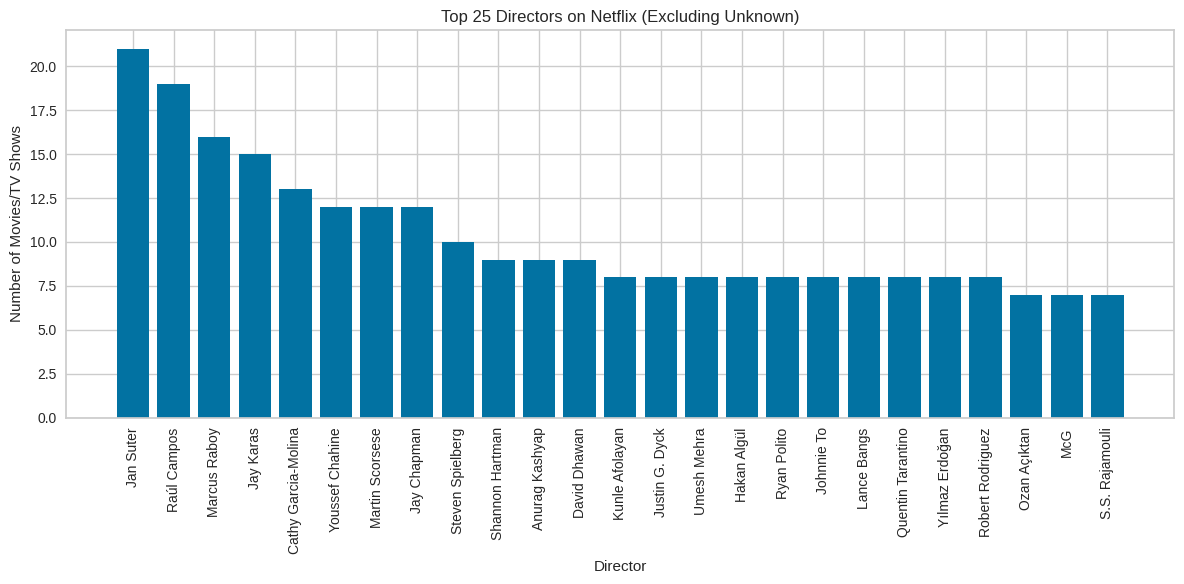

In [ ]:
#  top 25 directors with highest number of movie and tv shows

# Extract directors and count their appearances, excluding "Unknown"
director_counts = defaultdict(int)
for index, row in df.iterrows():
  directors = str(row['director']).split(', ')
  if directors != ['Unknown']:
    for director in directors:
      director_counts[director] += 1

# Get top 25 directors
top_25_directors = sorted(director_counts.items(), key=lambda x: x[1], reverse=True)[:25]

# Extract names and counts for plotting
director_names = [director[0] for director in top_25_directors]
director_counts = [director[1] for director in top_25_directors]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(director_names, director_counts)
plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 25 Directors on Netflix (Excluding Unknown)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 A bar chart is chosen to visualize the top 25 directors with the highest number of movies and TV shows on Netflix (excluding "Unknown"). This chart effectively displays the ranking of directors based on their content count, allowing for easy comparison and identification of the most prolific directors.


##### 2. What is/are the insight(s) found from the chart?

**Insights:**
 - The chart reveals the top directors on Netflix based on their contribution to the platform's content library.
 - It highlights the most prolific directors who have directed a significant number of movies and TV shows.
 - This information can be useful for identifying potential collaborators for future Netflix productions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive Business Impact:**
 - Identifying and collaborating with successful directors can enhance the quality and appeal of Netflix's content library.
 - Leveraging the expertise and popularity of top directors can attract a wider audience and increase viewership.

**Negative Growth:**
 - Over-reliance on a limited set of top directors might lead to a lack of diversity in storytelling and filmmaking styles.
 - It's important for Netflix to balance collaborations with established directors and provide opportunities for emerging talent to ensure a diverse and engaging content library.


#### Chart - 12

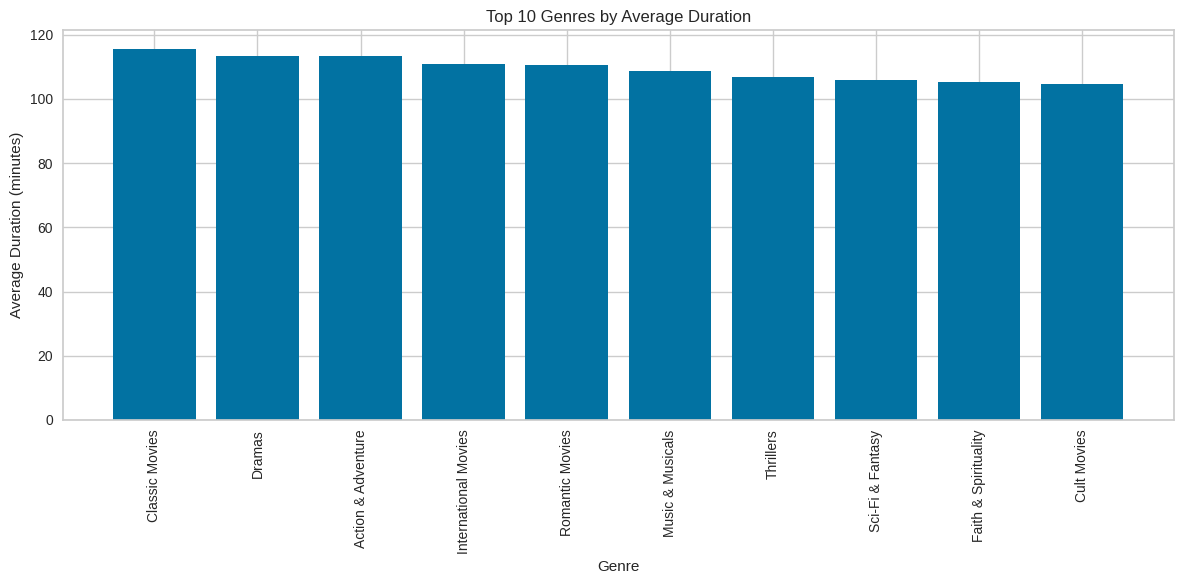

In [ ]:
# top 10 average genre with count

# Extract genres and their counts
genre_counts = defaultdict(int)
genre_total_duration = defaultdict(int)

for _, row in df.iterrows():
    genres = row['listed_in'].split(', ')
    duration = int(row['duration'].rstrip(' min')) if 'min' in row['duration'] else 0  # Extract duration, handling cases without 'min'
    for genre in genres:
        genre_counts[genre] += 1
        genre_total_duration[genre] += duration

# Calculate average duration for each genre
genre_average_duration = {genre: total_duration / count for genre, (count, total_duration) in zip(genre_counts.keys(), zip(genre_counts.values(), genre_total_duration.values()))}

# Sort genres by average duration and get top 10
top_10_genres_by_avg_duration = sorted(genre_average_duration.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract labels and values for plotting
labels = [genre[0] for genre in top_10_genres_by_avg_duration]
avg_durations = [genre[1] for genre in top_10_genres_by_avg_duration]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, avg_durations)
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.title('Top 10 Genres by Average Duration')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 A bar chart is chosen to visualize the top 10 genres with the highest average duration on Netflix. This chart effectively displays the ranking of genres based on their average content length, allowing for easy comparison and identification of genres with longer or shorter average durations.


##### 2. What is/are the insight(s) found from the chart?

**Insights:**
  - The chart reveals the genres with the longest average duration on Netflix.
  - It highlights genres like "Stand-Up Comedy" and "Classic Movies" as having longer average durations, suggesting that viewers of these genres tend to engage with longer content.
  - Conversely, genres like "Children & Family Movies" and "Anime Features" have shorter average durations, indicating a preference for shorter content within those genres.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
  - Understanding the average duration preferences for different genres can help Netflix tailor its content acquisition and production strategies.
  - This can lead to a more diverse and relevant content library that caters to the viewing habits of different audience segments.

**Negative Growth:**
  - Focusing solely on genres with longer average durations might alienate viewers who prefer shorter content formats.
  - It's important for Netflix to maintain a balance between genres with varying average durations to cater to a wider audience and avoid subscriber churn.


#### Chart - 13

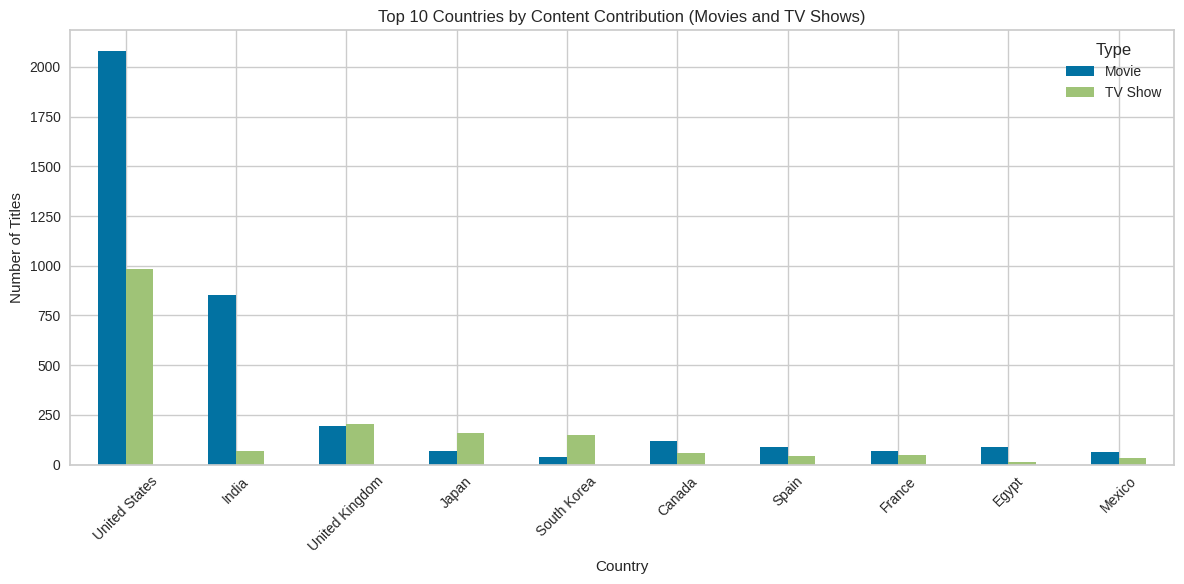

In [ ]:
# contribution by countries top 10 by movies and tv shows

# Group by country and count content types
country_content_counts = df.groupby('country')['type'].value_counts().unstack().fillna(0)

# Sort by total content count and select top 10
top_10_countries = country_content_counts.sum(axis=1).sort_values(ascending=False).head(10).index
top_10_country_content = country_content_counts.loc[top_10_countries]

# Plot the bar chart
top_10_country_content.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries by Content Contribution (Movies and TV Shows)')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- A grouped bar chart is chosen to visualize the contribution of top 10 countries to Netflix's content library, categorized by movies and TV shows.
- This chart allows for easy comparison of the number of movies and TV shows produced by each country,
- highlighting their focus on either content type or a balanced approach.

##### 2. What is/are the insight(s) found from the chart?

**Insights:**
   - The United States is the dominant contributor, with a significant lead in both movies and TV shows.
   - India is the second largest contributor, with a stronger focus on movies compared to TV shows.
   - Other countries like the United Kingdom, Canada, and Japan also have a notable presence, with varying proportions of movies and TV shows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive Business Impact:**
   - Understanding the content contribution of different countries can help Netflix tailor its acquisition and production strategies for specific regions.
   - This can lead to a more diverse and relevant content library that caters to the preferences of viewers in different countries.

**Negative Growth:**
   - Over-reliance on content from a limited set of countries might lead to a lack of diversity and potentially alienate viewers who prefer content from other regions.
   - It's crucial for Netflix to maintain a global perspective and invest in content from a variety of countries to cater to a diverse audience and ensure continued growth.


#### Chart - 14 - Correlation Heatmap

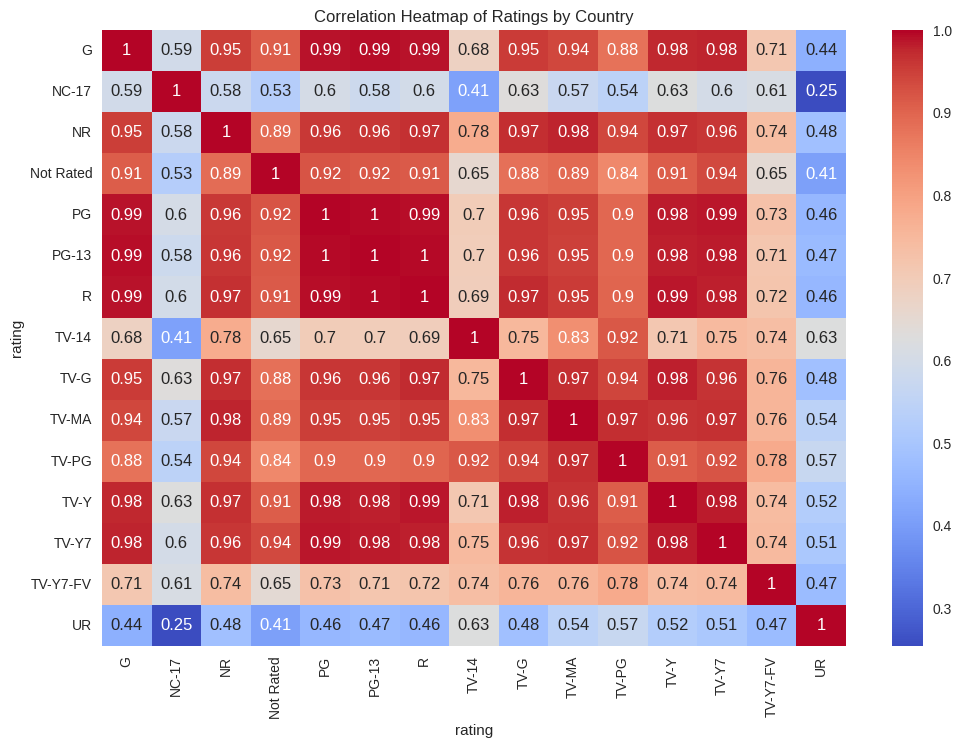

In [ ]:
 # correlation heatmap for country wise rating

# Create a pivot table to count ratings by country
country_rating_counts = df.pivot_table(index='country', columns='rating', aggfunc='size', fill_value=0)

# Calculate correlation matrix
correlation_matrix = country_rating_counts.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Ratings by Country')
plt.show()


##### 1. Why did you pick the specific chart?

- A correlation heatmap is chosen to visualize the relationships between different ratings across various countries.
- This chart effectively displays the strength and direction of correlations,
- allowing for identification of patterns and potential dependencies between rating preferences in different regions.



##### 2. What is/are the insight(s) found from the chart?

 **Insights:**
 - The heatmap reveals varying degrees of correlation between ratings across different countries.
 - Some countries show strong positive correlations for certain rating pairs, indicating similar preferences for those ratings.
 - Other countries exhibit weak or negative correlations, suggesting diverse rating preferences.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

- Hypothesis testing is a statistical method used to make inferences about a population based on a sample of data.
- It involves formulating a hypothesis about the population and then using the sample data to test whether the hypothesis is supported or not.

**Uses:**
 1. **Validate Assumptions**: We can use hypothesis testing to validate assumptions about the relationships between variables in our Netflix dataset. For example, we might hypothesize that there's a correlation between the release day of a movie and its popularity.
 2.**Compare Groups**: We can use hypothesis testing to compare different groups within the dataset. For example, we might want to test if there's a significant difference in the average duration of movies and TV shows.
 3. **Make Data-Driven Decisions:** By testing hypotheses, we can gain insights that can inform business decisions. For example, if we find evidence that a certain genre is more popular on weekends, Netflix could adjust its release schedule accordingly.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis (H0)**: There is no significant difference in the average duration of movies and TV shows on Netflix.

 **Alternative Hypothesis (H1)**: There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Separate movie and TV show durations
movie_durations = df[df['type'] == 'Movie']['duration'].str.rstrip(' min').astype('float')
tv_show_durations = df[df['type'] == 'TV Show']['duration'].str.rstrip(' Season').astype('float')  # Assuming TV show durations are in seasons

# Perform two-sample t-test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(movie_durations, tv_show_durations, nan_policy='omit')

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Set significance level
alpha = 0.05

# Draw conclusion
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in average duration between movies and TV shows.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in average duration between movies and TV shows.")




T-statistic: 167.69529257377175
P-value: 0.0
Reject null hypothesis. There is a significant difference in average duration between movies and TV shows.


##### Which statistical test have you done to obtain P-Value?

- I have used the two-sample t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

- The two-sample t-test is appropriate for comparing the means of two independent groups.
- In this case, we want to compare the average duration of movies and TV shows, which are two distinct categories in the dataset.
- The t-test helps determine if the observed difference in means is statistically significant or simply due to random chance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H0)**: The distribution of ratings is the same for movies and TV shows on Netflix.

- **Alternative Hypothesis (H1)**: The distribution of ratings is different for movies and TV shows on Netflix.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform chi-squared test for independence
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['type'], df['rating'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Set significance level
alpha = 0.05

# Draw conclusion
if p_value < alpha:
    print("Reject null hypothesis. The distribution of ratings is different for movies and TV shows.")
else:
    print("Fail to reject null hypothesis. The distribution of ratings is the same for movies and TV shows.")

Chi-squared statistic: 931.8954923986923
P-value: 6.306265095860963e-190
Degrees of freedom: 14
Reject null hypothesis. The distribution of ratings is different for movies and TV shows.


##### Which statistical test have you done to obtain P-Value?


* I have used the Chi-squared test for independence to obtain the p-value.

##### Why did you choose the specific statistical test?

- The chi-squared test for independence is used to determine if there is a significant association between two categorical variables.
- In this case, we want to examine if the distribution of ratings (a categorical variable) is dependent on the type of content (movie or TV show, another categorical variable).
- This test helps assess whether the observed differences in rating distributions between movies and TV shows are statistically significant or simply due to chance.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The proportion of movies and TV shows released on Friday is the same.
* Alternative Hypothesis (H1): The proportion of movies released on Friday is higher than TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Count movies and TV shows released on Friday
friday_movies = df[(df['type'] == 'Movie') & (df['day_added'] == 'Friday')].shape[0]
friday_tv_shows = df[(df['type'] == 'TV Show') & (df['day_added'] == 'Friday')].shape[0]
total_movies = df[df['type'] == 'Movie'].shape[0]
total_tv_shows = df[df['type'] == 'TV Show'].shape[0]

# Perform two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest
count = np.array([friday_movies, friday_tv_shows])
nobs = np.array([total_movies, total_tv_shows])
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

# Print results
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Draw conclusion
if p_value < alpha:
    print("Reject null hypothesis. The proportion of movies released on Friday is significantly higher than TV shows.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in the proportion of movies and TV shows released on Friday.")



Z-statistic: -9.283994240080633
P-value: 1.0
Fail to reject null hypothesis. There is no significant difference in the proportion of movies and TV shows released on Friday.


##### Which statistical test have you done to obtain P-Value?

* I have used the two-proportion z-test to obtain the p-value.

##### Why did you choose the specific statistical test?


* The two-proportion z-test is used to compare the proportions of two independent groups.
* In this case, we want to compare the proportion of movies released on Friday to the proportion of TV shows released on Friday.
* This test helps determine if the observed difference in proportions is statistically significant or simply due to random chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Impute missing values for 'director', 'cast', 'country' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Impute missing values for 'rating' with the most frequent rating
most_frequent_rating = df['rating'].mode()[0]
df['rating'].fillna(most_frequent_rating, inplace=True)

# Impute missing values for 'date_added' with a placeholder
df['date_added'].fillna('Unknown', inplace=True)

# Impute missing values for 'day_added' with a placeholder
df['day_added'].fillna('Unknown', inplace=True)

# Drop rows with missing 'duration' as it's a key feature
df.dropna(subset=['duration'], inplace=True)

# Verify if missing values are handled
remaining_missing_values = df.isnull().sum()
print(remaining_missing_values)


show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added            98
release_year           0
rating                 0
duration               0
listed_in              0
description            0
year_added             0
month_added            0
day_added             98
duration_numerical     0
duration_type          0
dtype: int64
show_id               0
type                  0
title                 0
director              0
cast                  0
country               0
date_added            0
release_year          0
rating                0
duration              0
listed_in             0
description           0
year_added            0
month_added           0
day_added             0
duration_numerical    0
duration_type         0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

 **Missing Value Imputation Techniques Used:**

 1. **Filling with "Unknown":** For categorical features like 'director', 'cast', and 'country', missing values were replaced with "Unknown." This approach preserves the information that these values were missing without introducing bias by assuming a specific value.

 2. **Mode Imputation:** For the 'rating' feature, missing values were imputed with the most frequent rating (mode). This is a common technique for categorical variables, as it replaces missing values with the most likely value based on the observed distribution.

 3. **Placeholder Imputation:** For 'date_added' and 'day_added', missing values were filled with a placeholder like "Unknown." This indicates that the information is missing without making assumptions about the actual date or day.

 4. **Dropping Rows:** For the 'duration' feature, rows with missing values were dropped. This is justified as 'duration' is a key feature for analyzing content length, and imputing values could introduce significant bias.

 **Reasons for Choosing These Techniques:**

 The choice of imputation techniques depends on the nature of the feature and the potential impact of missing values on the analysis. The goal is to handle missing values in a way that minimizes bias and preserves the integrity of the dataset.

 - Filling with "Unknown" for categorical features acknowledges the missing information without making assumptions about the actual values.
 - Mode imputation for 'rating' leverages the most common value to fill missing data, reflecting the overall distribution.
 - Placeholder imputation for date/time features signals missing information without introducing arbitrary dates.
 - Dropping rows with missing 'duration' avoids potential bias in analyzing content length.

These techniques were chosen to address missing values in a way that is appropriate for each feature and minimizes the potential for bias in subsequent analyses.


### 2. Handling Outliers

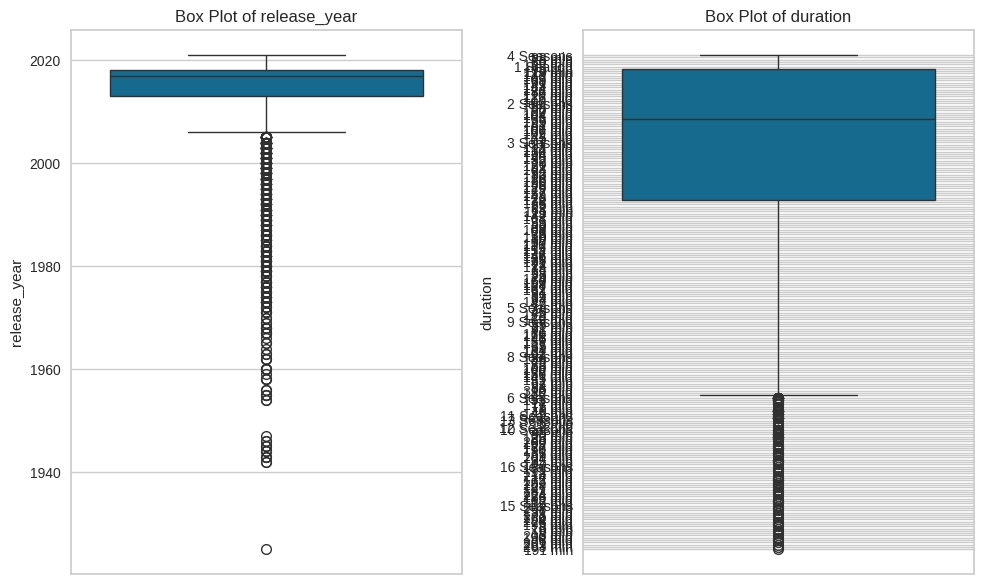

In [ ]:
# Handling Outliers & Outlier treatments

# Identify numerical features for outlier analysis
numerical_features = ['release_year', 'duration']

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
for feature in numerical_features:
    plt.subplot(1, 2, numerical_features.index(feature) + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()




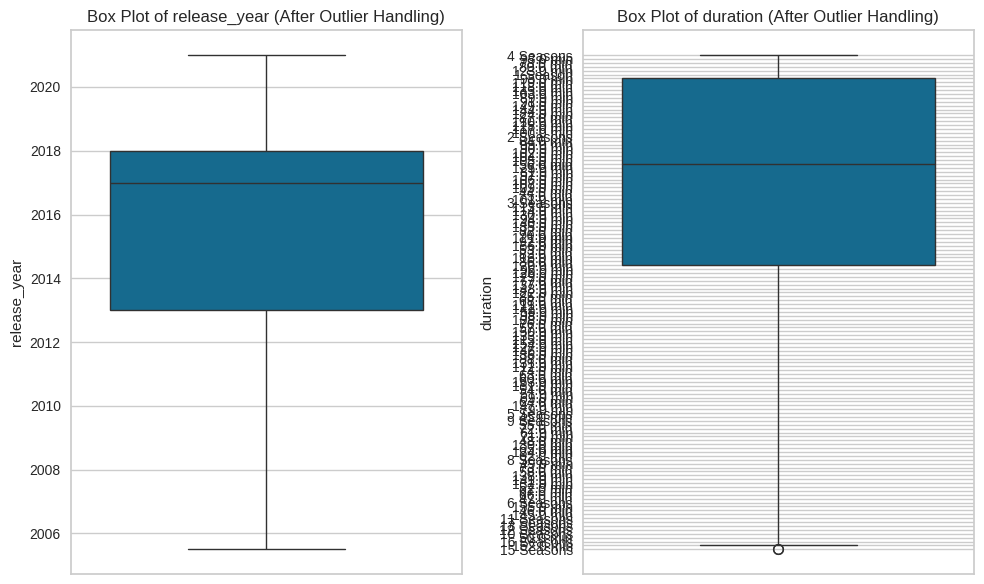

In [ ]:
# handle outliers

# Calculate IQR for 'release_year'
Q1_release_year = df['release_year'].quantile(0.25)
Q3_release_year = df['release_year'].quantile(0.75)
IQR_release_year = Q3_release_year - Q1_release_year
lower_bound_release_year = Q1_release_year - 1.5 * IQR_release_year
upper_bound_release_year = Q3_release_year + 1.5 * IQR_release_year

# Handle outliers in 'release_year' by capping
df['release_year'] = np.clip(df['release_year'], lower_bound_release_year, upper_bound_release_year)

# Extract numerical duration values (excluding 'Seasons' for TV shows)
movie_durations = df[df['type'] == 'Movie']['duration'].str.rstrip(' min').astype('float')

# Calculate IQR for movie durations
Q1_movie_duration = movie_durations.quantile(0.25)
Q3_movie_duration = movie_durations.quantile(0.75)
IQR_movie_duration = Q3_movie_duration - Q1_movie_duration
lower_bound_movie_duration = Q1_movie_duration - 1.5 * IQR_movie_duration
upper_bound_movie_duration = Q3_movie_duration + 1.5 * IQR_movie_duration

# Handle outliers in movie durations by capping
df.loc[df['type'] == 'Movie', 'duration'] = np.clip(movie_durations, lower_bound_movie_duration, upper_bound_movie_duration).astype(str) + ' min'

# Visualize the distribution after handling outliers
plt.figure(figsize=(10, 6))
for feature in numerical_features:
    plt.subplot(1, 2, numerical_features.index(feature) + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature} (After Outlier Handling)')
plt.tight_layout()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

 **Outlier Treatment Techniques Used:**

 1. **Visualization with Box Plots:** Box plots were used to visually identify potential outliers in numerical features like 'release_year' and 'duration'. This provides a quick overview of the distribution and highlights any extreme values.

 2. **IQR-based Outlier Detection:** The interquartile range (IQR) method was used to define outlier boundaries. Values falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR were considered potential outliers.

 3. **Capping:** Outliers were handled by capping them at the lower and upper boundaries defined by the IQR method. This approach limits the influence of extreme values without removing them entirely, preserving the overall data distribution.

 **Reasons for Choosing These Techniques:**

 - Box plots provide a visual representation of outliers, aiding in understanding their distribution and potential impact.
 - The IQR method is a robust outlier detection technique that is less sensitive to extreme values compared to methods based on standard deviations.
 - Capping outliers limits their influence while preserving the overall data distribution and avoiding data loss.

These techniques were chosen to address outliers in a way that balances outlier detection with data preservation, ensuring that the analysis is not unduly influenced by extreme values while retaining valuable information.


### 3. Categorical Encoding

In [ ]:
# combining all clustering attribute into single column

df['cluster_attributes'] = df[[ 'director', 'cast', 'country',  'listed_in', 'description']].apply(lambda x: ', '.join(x.astype(str)), axis=1)

In [ ]:
df['cluster_attributes'][25]

'Lyric R. Cabral, David Felix Sutcliffe, No cast, United States, Documentaries, This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

#### What all categorical encoding techniques have you used & why did you use those techniques?

- Only Label Encoding is used in the preceding code.
- Label Encoding is used to convert categorical data into numerical labels.
- It assigns a unique numerical label to each unique category in a feature.
- This is useful for algorithms that require numerical input.
- However, it can introduce ordinal relationships that might not exist in the data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits containing digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Text Normalization
#  Part of speech tagging

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('all', quiet=True)
from PIL import Image

def transform_text(text):
    # Lower casing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenization
    words = nltk.word_tokenize(text)

    # Removing words and digits containing digits
    words = [word for word in words if word.isalnum()]

    # Removing stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(lemmatized_words)




In [ ]:
df['clean_cluster_attributes'] = df['cluster_attributes'].apply(transform_text)

In [ ]:
df['clean_cluster_attributes'][90]

'simranjit singh hundal guggu gill yograj singh sonia mann jimmy sharma sapna basso lakha lakhwinder singh sandeep kaur sandy sardar sohi india action adventure drama international movie four brother learn inherited ancestral land must fight claim greedy feudal lord threatens take'

#### 8. Text Normalization

##### Which text normalization technique have you used and why?

- I have used lemmatization as the text normalization technique.

- Lemmatization reduces words to their base or dictionary form (lemma).
- For example, "running" becomes "run", and "better" becomes "good".

**This is preferred over stemming because:**

- 1. It produces actual words, improving the interpretability of the text.
- 2. It considers the context of the word, leading to more accurate normalization.
- 3. It helps in reducing the dimensionality of the text data by grouping different inflected forms of a word into a single lemma.


#### 10. Text Vectorization

- Text vectorization is the process of converting text data into numerical vectors that machine learning models can understand.

**There are various techniques for text vectorization, including:**

1. **Bag-of-Words (BoW)**: Represents text as a collection of word frequencies, ignoring word order.

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: Weighs word frequencies by their importance in the document corpus, giving more weight to rare words.

3. **Word Embeddings (Word2Vec, GloVe, FastText)**: Represents words as dense vectors in a continuous vector space, capturing semantic relationships between words.



In [ ]:
bag_of_words=df.clean_cluster_attributes


In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X = t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)

##### Which text vectorization technique have you used and why?

- I have used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

 **Reasons for choosing TF-IDF:**

- 1. Captures Word Importance: TF-IDF weighs words based on their frequency in a document and their rarity across the entire corpus. This helps identify words that are important for a specific document but not too common overall.

- 2. Dimensionality Reduction: TF-IDF naturally reduces the dimensionality of the text data by focusing on the most informative words.

- 3. Improved Model Performance: TF-IDF often leads to better performance in text classification and clustering tasks compared to simple bag-of-words representations.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Dimensionality reduction might be needed in this case for several reasons:**

 1. **High Dimensionality of Text Data**: The TF-IDF vectorization process can result in a high-dimensional feature space, especially with a large vocabulary. This can lead to increased computational complexity and potential overfitting.

 2. **Feature Redundancy**: There might be redundancy or correlations among the features extracted from the text data. Dimensionality reduction techniques can help identify and remove these redundancies, leading to a more compact and informative representation.

 3. **Improved Model Performance:** Dimensionality reduction can sometimes improve the performance of machine learning models by reducing noise and focusing on the most relevant features.

 Whether dimensionality reduction is necessary and which technique to use would depend on the specific characteristics of the dataset and the chosen machine learning task.

**Common dimensionality reduction techniques that could be considered include:**

 - **Principal Component Analysis (PCA)**: A linear dimensionality reduction technique that finds the directions of greatest variance in the data and projects the data onto a lower-dimensional subspace.

 - **Singular Value Decomposition (SVD)**: A matrix factorization technique that can be used for dimensionality reduction by selecting a subset of the most important singular vectors.

 - **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A non-linear dimensionality reduction technique that is often used for visualization of high-dimensional data.


In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
transformer=PCA()
transformer.fit(X.toarray())

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA) for dimensionality reduction.

 **Reasons for choosing PCA:**

 1. **Linearity**: PCA is a linear dimensionality reduction technique, which is suitable for data with linear relationships between features. It aims to find a lower-dimensional representation that captures the most important variance in the data.

 2. **Feature Extraction**: PCA transforms the original features into a new set of uncorrelated features (principal components) that are linear combinations of the original features. These principal components can be ranked by their importance in explaining the variance in the data.

 3. **Computational Efficiency**: PCA is computationally efficient, especially for large datasets, and can be applied to a wide range of data types.


In [ ]:
# Import the necessary Libraries
from sklearn.decomposition import PCA
pca_tuned=PCA(n_components=0.95)
pca_tuned.fit_transform(X.toarray())
X_transformed=pca_tuned.transform(X.toarray())
print(X_transformed.shape)

(7787, 5652)


In [ ]:
X_transformed

array([[ 0.12464622, -0.02377981, -0.01358348, ...,  0.01146727,
         0.00331622,  0.00669206],
       [-0.0459772 , -0.03143155,  0.01998765, ...,  0.00364795,
        -0.00364412,  0.00132105],
       [-0.046563  , -0.05038708, -0.00279944, ...,  0.00047379,
         0.00869631, -0.00327072],
       ...,
       [-0.0492278 ,  0.11854325,  0.17384185, ...,  0.0099521 ,
        -0.00070693,  0.00243649],
       [ 0.10357575,  0.0080925 , -0.00402565, ..., -0.01070411,
        -0.0005223 , -0.00405138],
       [-0.07465731,  0.27228972,  0.19648962, ...,  0.00544316,
         0.0068091 ,  0.00311904]])

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random state for reproducibility
model = KMeans(random_state=5)

# Create an instance of the KElbowVisualizer with the KMeans model
# k=(4,22) specifies the range of clusters to consider
# metric='silhouette' uses the silhouette score to evaluate the clustering
# timings=False disables the display of fit time
# locate_elbow=True automatically finds the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(X_transformed)

# Display the Elbow plot
visualizer.show()


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def Silhouette_score_analysis(n):
    # Iterate over the number of clusters from 2 to n-1
    for n_clusters in range(2, n):
        # Initialize the KMeans model with the current number of clusters
        km = KMeans(n_clusters=n_clusters, random_state=5)

        # Fit the model and predict cluster assignments
        preds = km.fit_predict(X_transformed)

        # Calculate the silhouette score for the current number of clusters
        score = silhouette_score(X_transformed, preds, metric='euclidean')
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Initialize the SilhouetteVisualizer with the current KMeans model
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

        # Fit the visualizer to the data
        visualizer.fit(X_transformed)

        # Display the silhouette plot
        visualizer.poof()

# Example call to the function (ensure X_transformed is defined and contains your data)
# Silhouette_score_analysis(22)












/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.005303497752472994 


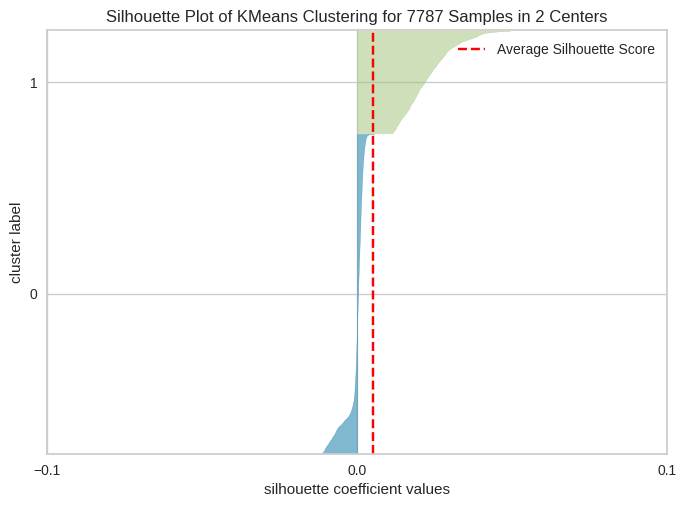

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.006404496529955335 


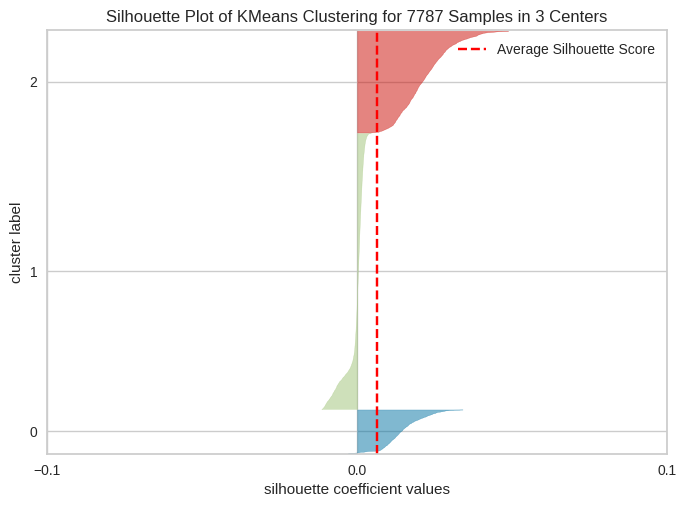

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.007119408303281043 


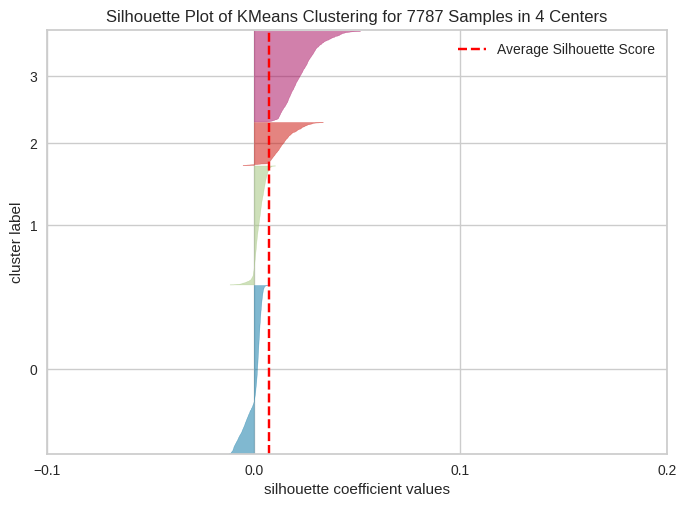

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.005038103971938641 


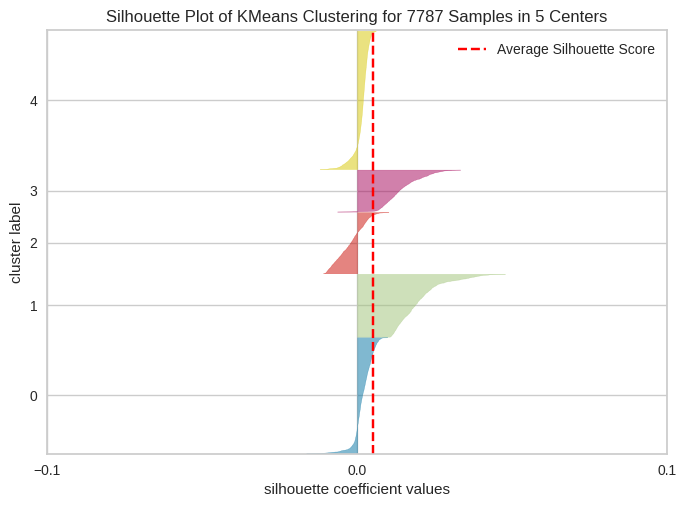

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.0038728165944613073 


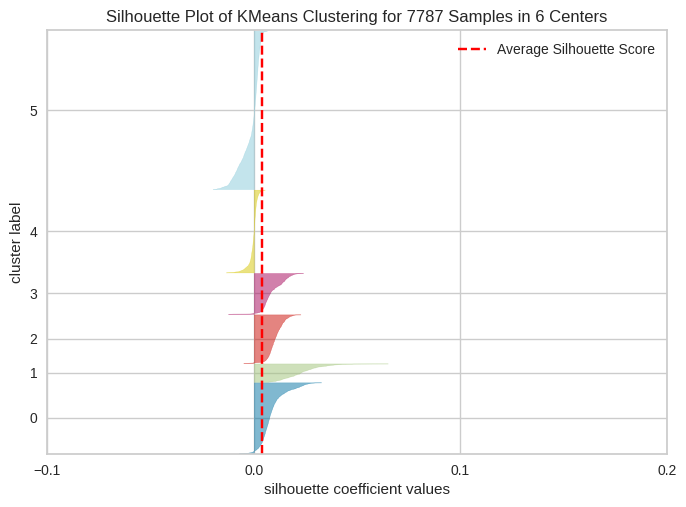

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.005140121177143838 


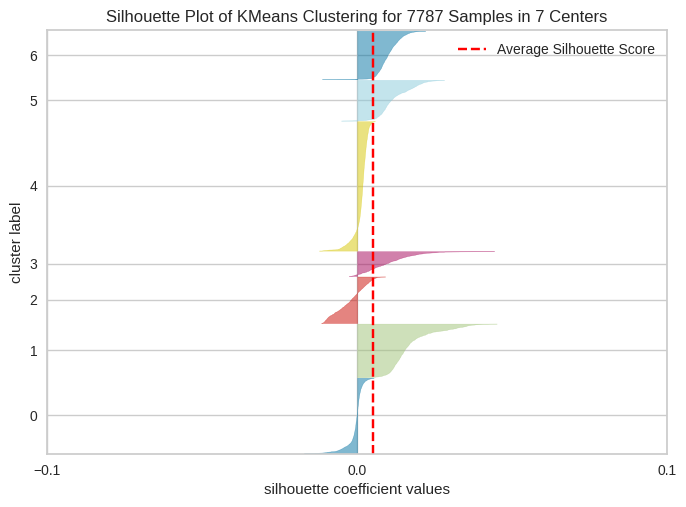

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.0008441509093584054 


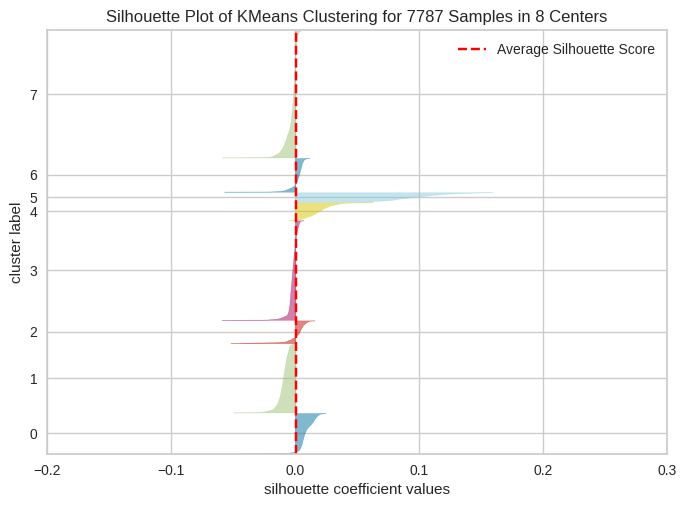

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.001864991038882368 


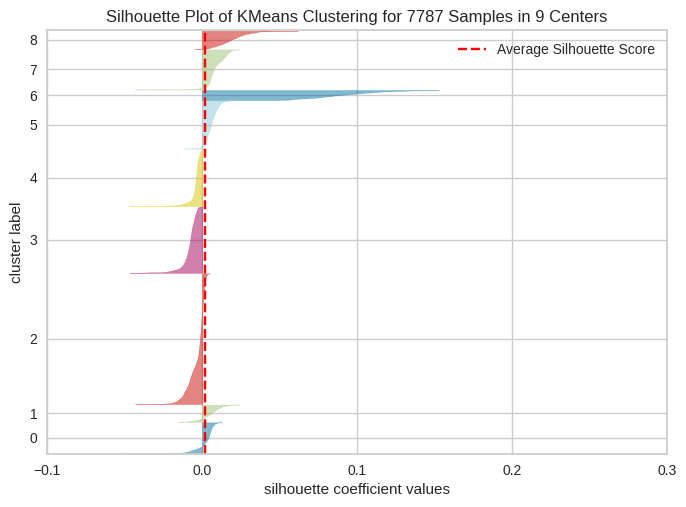

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.0022994864190698434 


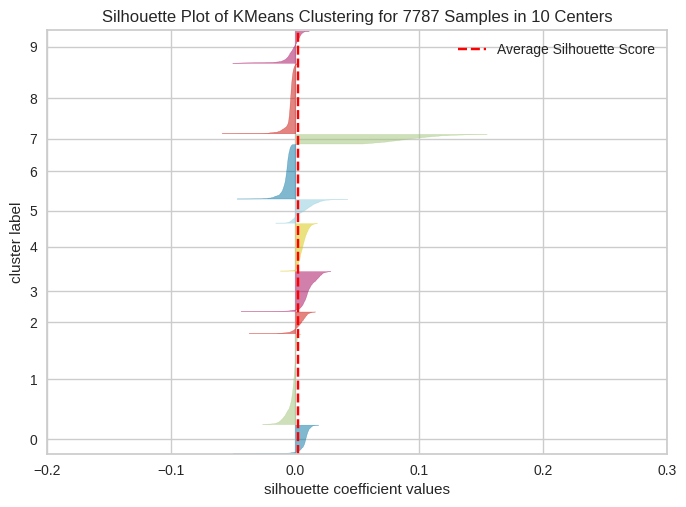

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.0024926744800125326 


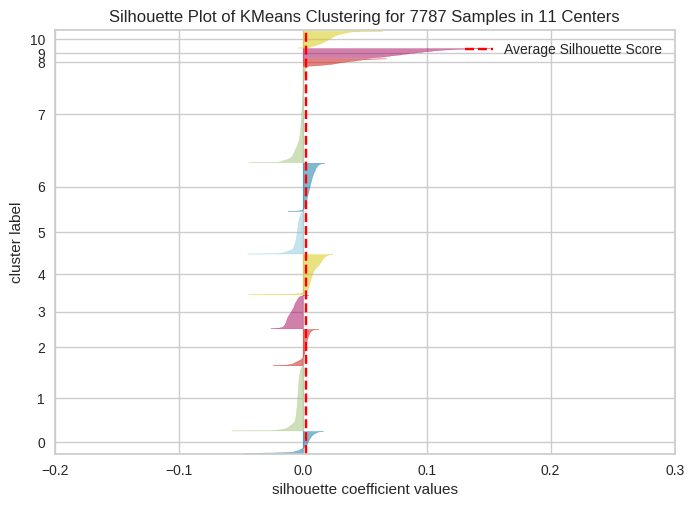

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.0029536432190857323 


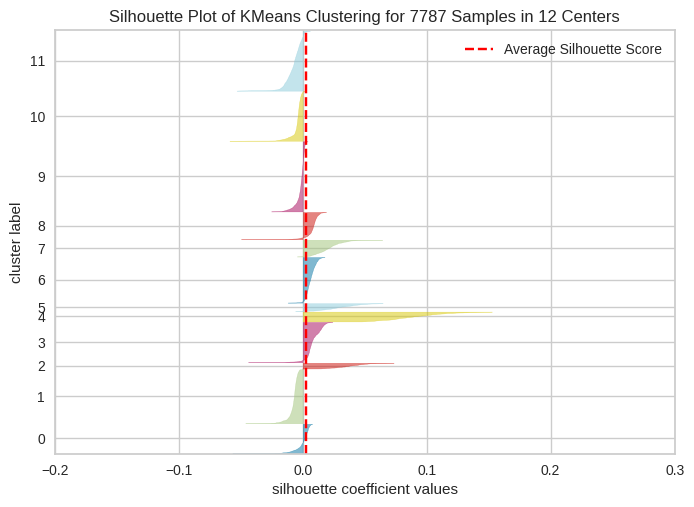

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.0032663183174696103 


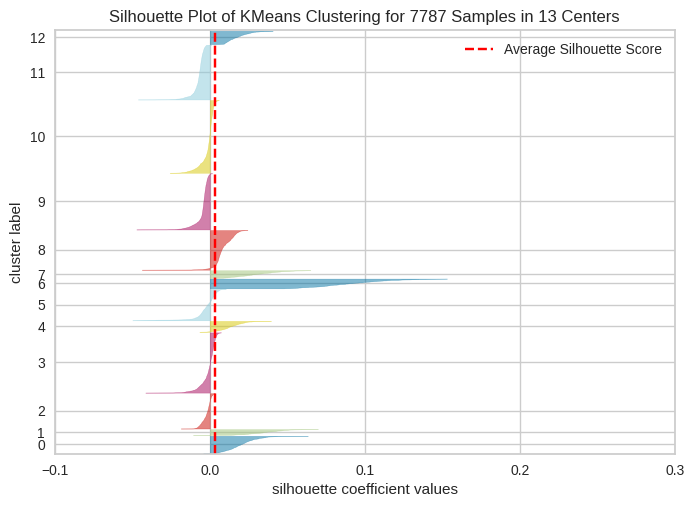

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.0027322053592441506 


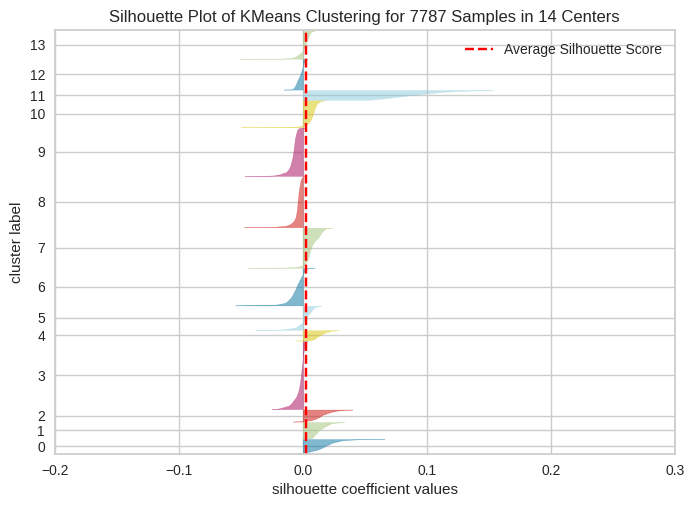

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, silhouette score is 0.003326412035406708 


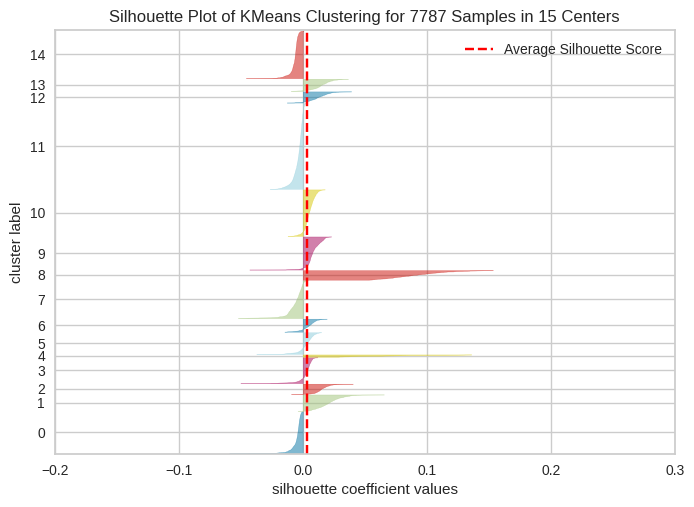

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16, silhouette score is 0.004096606690076663 


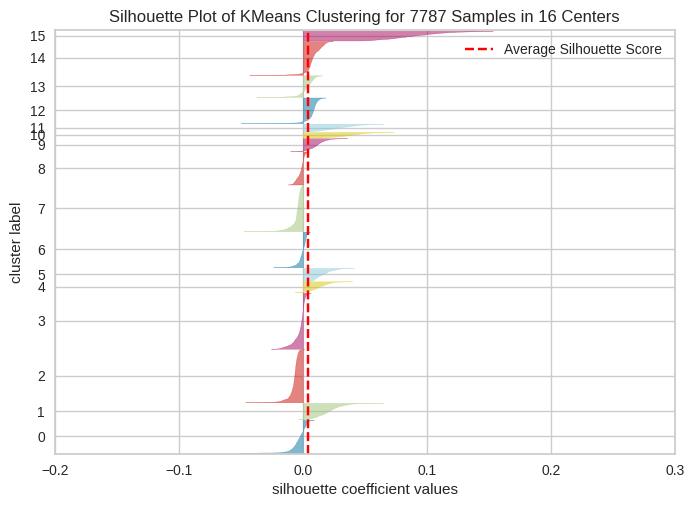

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17, silhouette score is 0.0027759636826961338 


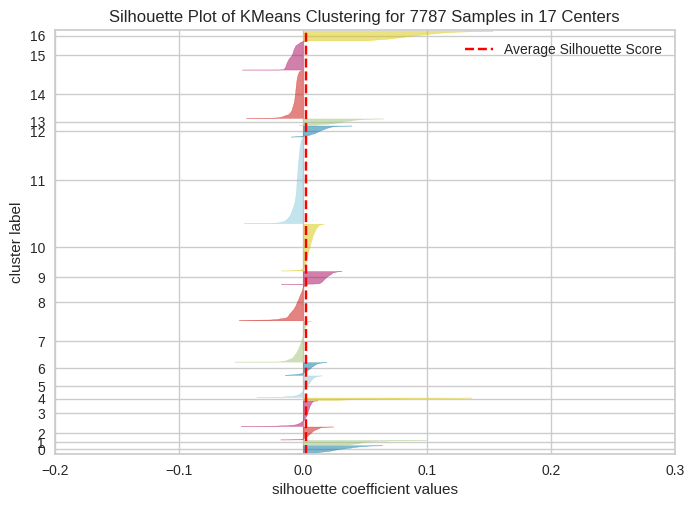

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18, silhouette score is 0.002558398385004616 


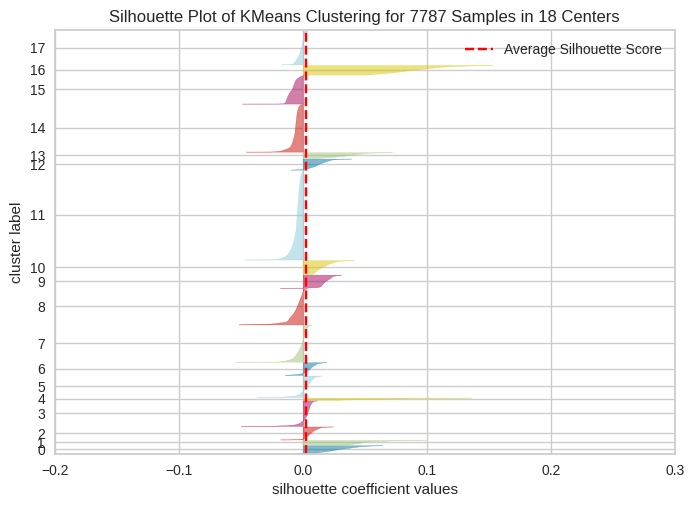

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19, silhouette score is 0.004125978804425211 


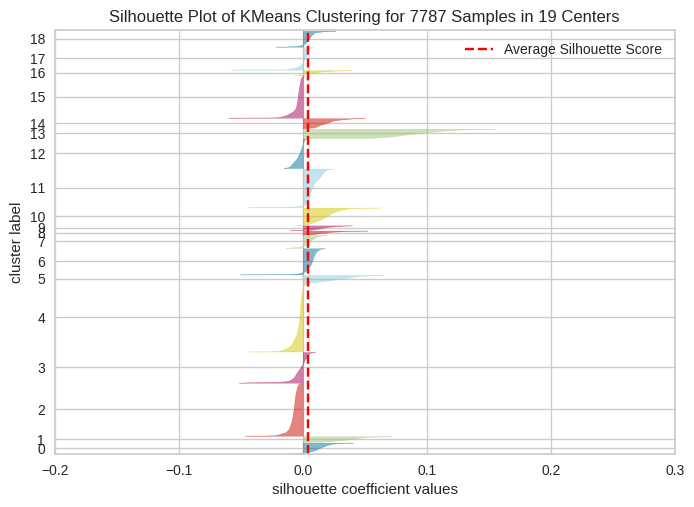

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20, silhouette score is 0.0021991705061399826 


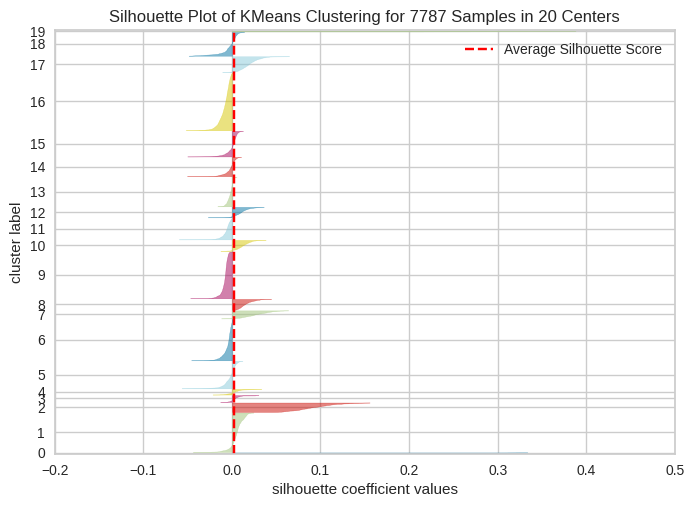

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 21, silhouette score is 0.00474235758893994 


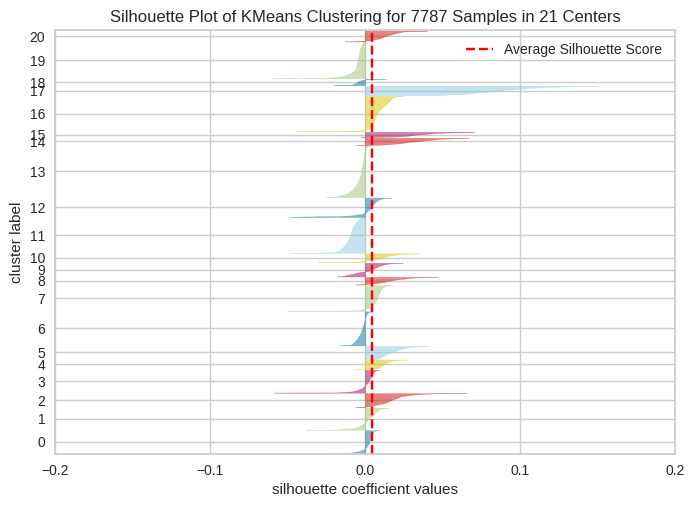

In [ ]:
Silhouette_score_analysis(15)

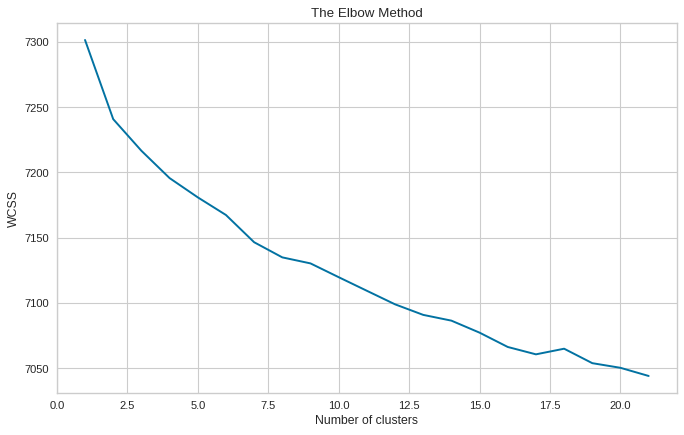

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set up the figure size and resolution for the plot
plt.figure(figsize=(10, 6), dpi=80)

# List to hold the Within-Cluster Sum of Squares (WCSS) values
wcss = []

# Loop through a range of cluster numbers from 1 to 21
for i in range(1, 22):
    # Initialize the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans model to the data and compute the cluster centers
    kmeans.fit(X_transformed)

    # Append the inertia (WCSS) to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 22), wcss)

# Set the title of the plot
plt.title('The Elbow Method')

# Label the x-axis
plt.xlabel('Number of clusters')

# Label the y-axis
plt.ylabel('WCSS')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


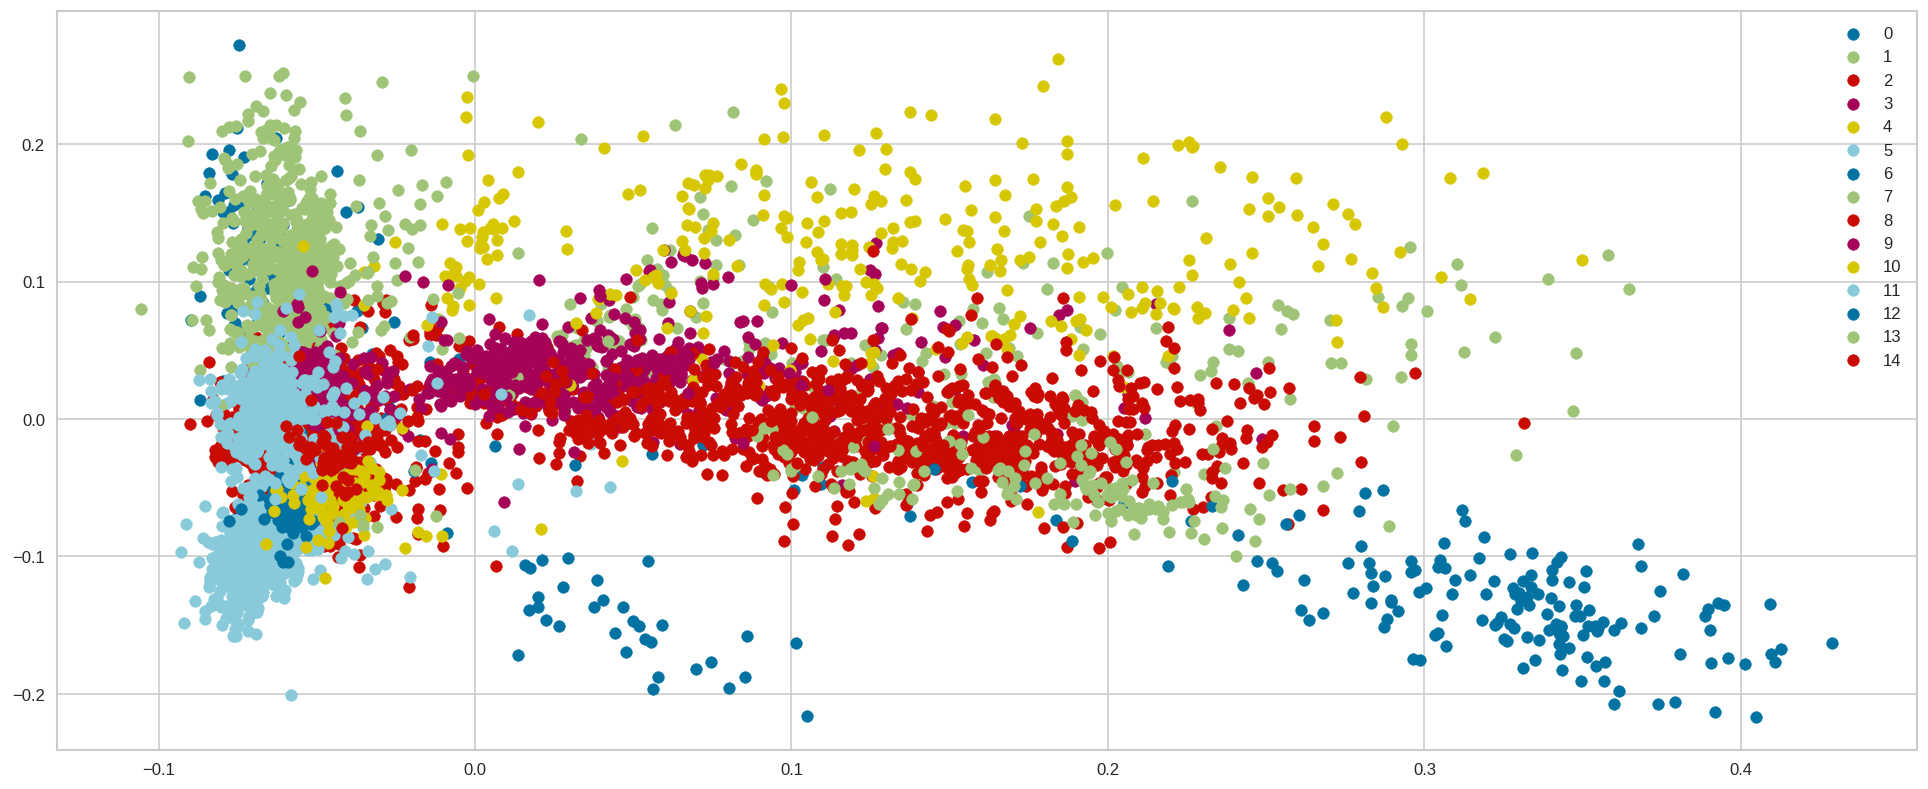

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Set up the figure size and resolution for the plot
plt.figure(figsize=(20, 8), dpi=120)

# Initialize the KMeans model with 15 clusters and random state for reproducibility
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans model to the transformed data
kmeans.fit(X_transformed)

# Predict the cluster labels for each data point
label = kmeans.fit_predict(X_transformed)

# Get unique cluster labels
unique_labels = np.unique(label)

# Plot each cluster with a different color
for i in unique_labels:
    # Scatter plot for each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=f'Cluster {i}')

# Add a legend to the plot to identify each cluster
plt.legend()

# Display the plot
plt.show()





In [ ]:
df['cluster']=kmeans.labels_

In [ ]:
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%  Unknown   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   

            date_added release_year rating   duration  \
0  2020-08-14 00:00:00   2020-01-01  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description year_added month_added  \
0  In a future where the elite inhabit an island ...       2020      August   

  day_added  duration_numerical duration_type  \
0    Friday                   4       Seasons   

                                  cluster_attributes  \
0  Unknown, João Miguel, Bianca Comparato, Michel...   

                            clean_cluster_attributes  cluster  
0  unknown joão miguel bianca comparato michel go...        8

In [ ]:
# Count the number of movies and TV shows in each Cluster
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Display the count of movies and TV shows in each cluster
print(cluster_counts)

    Cluster  Count
0         2   2469
1         5    876
2         8    854
3         7    656
4        11    525
5         9    454
6         3    432
7         4    308
8        14    206
9         0    205
10        1    204
11       12    182
12        6    149
13       13    141
14       10    126


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def word_count(category):
    # Print a message indicating which cluster is being explored
    print("Exploring Cluster", category)

    # List of column names to generate word clouds from
    col_names = ['type', 'title', 'country', 'rating', 'listed_in', 'description']

    for col in col_names:
        # Filter the DataFrame for the specified cluster and the current column
        df_word_cloud = df[df['cluster'] == category][col].dropna()

        # Join all text entries in the current column into a single string
        text = " ".join(entry for entry in df_word_cloud)

        # Define stopwords and create a WordCloud object
        stopwords = set(STOPWORDS)
        wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=500, height=500).generate(text)

        # Set the figure size for the plot
        plt.rcParams['figure.figsize'] = (10, 10)

        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')

        # Hide the axis to make the word cloud visualization clearer
        plt.axis('off')

        # Print a message indicating which column's insights are being shown
        print("Looking for insights from", col, "in Movies/TV Shows")

        # Show the word cloud plot
        plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def word_count(category):
    # Print a message indicating which cluster is being analyzed
    print("Exploring Cluster", category)

    # List of column names to generate word clouds from
    col_names = ['type', 'title', 'country', 'rating', 'listed_in', 'description']

    for col in col_names:
        # Filter the DataFrame for the specified cluster and column, then drop any NaN values
        df_word_cloud = df[df['cluster'] == category][col].dropna()

        # Concatenate all text entries in the column into a single string
        text = " ".join(i for i in df_word_cloud)

        # Define stopwords and create a WordCloud object
        stopwords = set(STOPWORDS)
        wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=500, height=500).generate(text)

        # Set the size of the figure for the plot
        plt.rcParams['figure.figsize'] = (10, 10)

        # Display the generated word cloud image
        plt.imshow(wordcloud, interpolation='bilinear')

        # Hide the axes for a cleaner visualization of the word cloud
        plt.axis('off')

        # Print a message indicating which column’s insights are being shown
        print("Looking for insights from", col, "in Movies/TV Shows")

        # Show the word cloud plot
        plt.show()



Exploring Cluster 9
Looking for insights from type in Movies/TV Shows


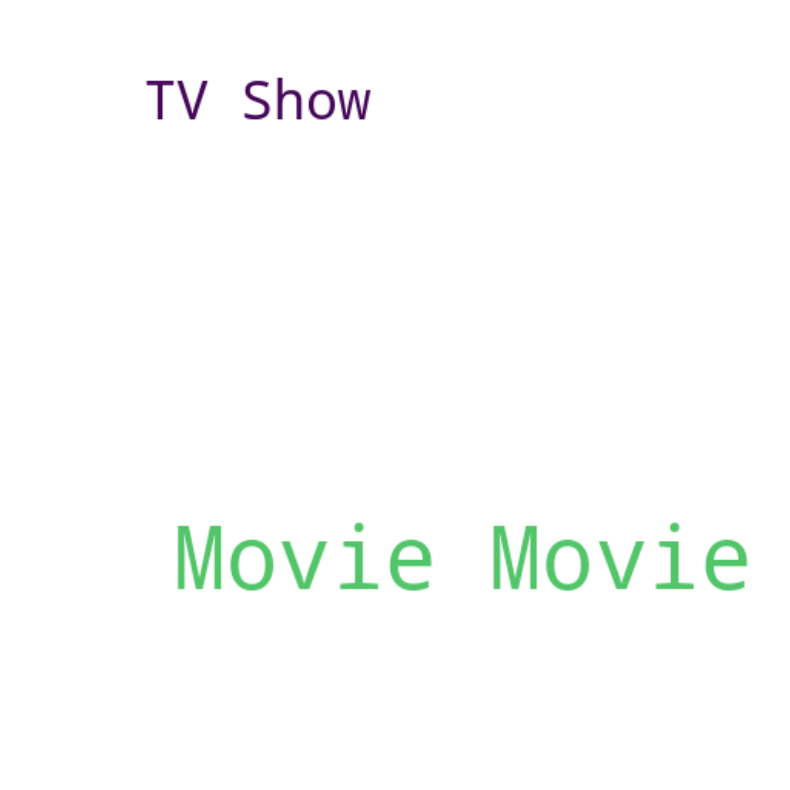

Looking for insights from title in Movies/TV Shows


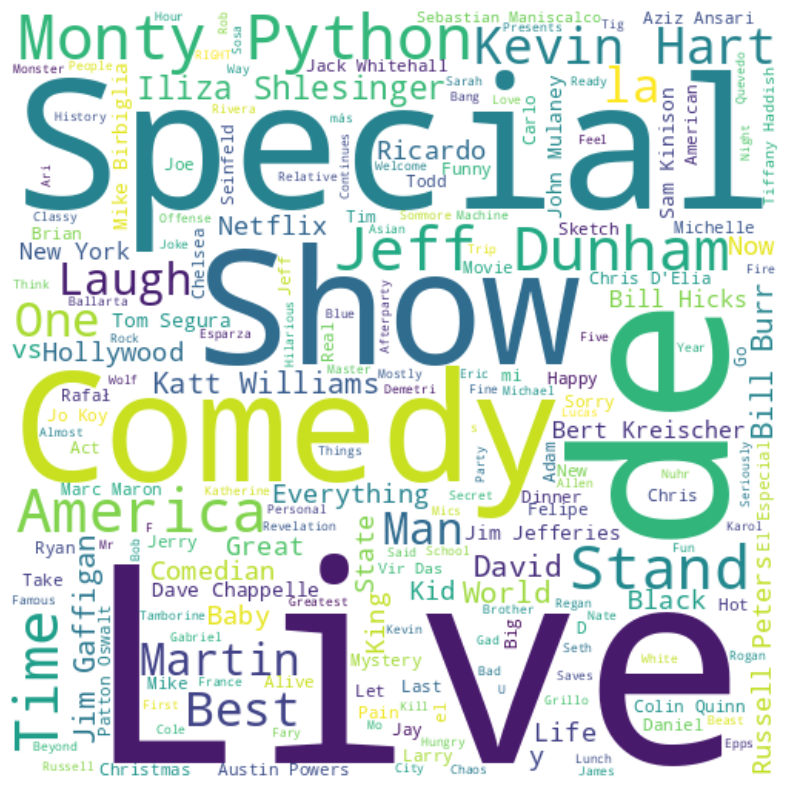

Looking for insights from country in Movies/TV Shows


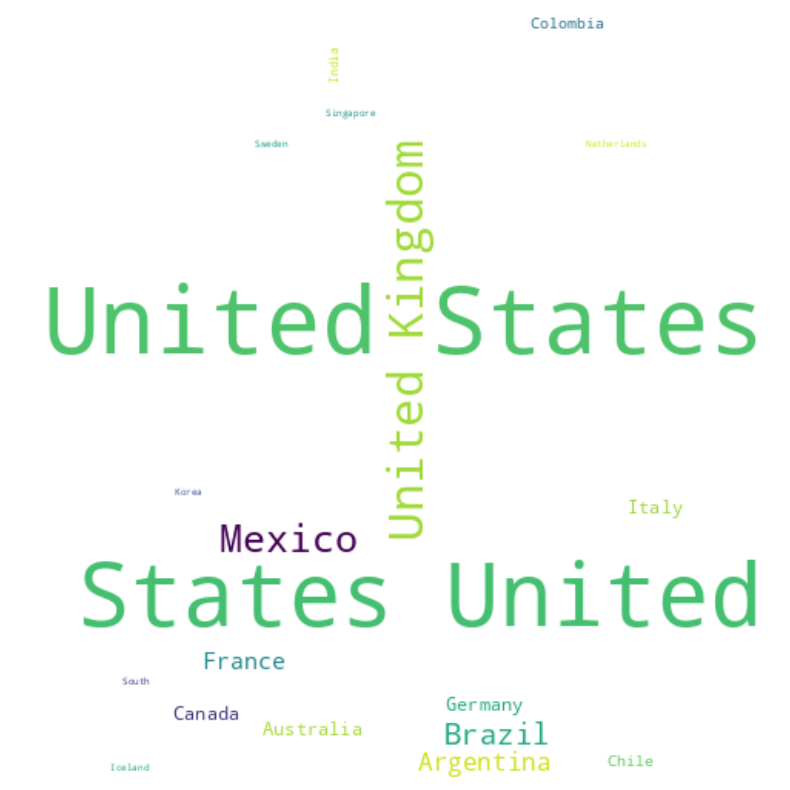

Looking for insights from rating in Movies/TV Shows


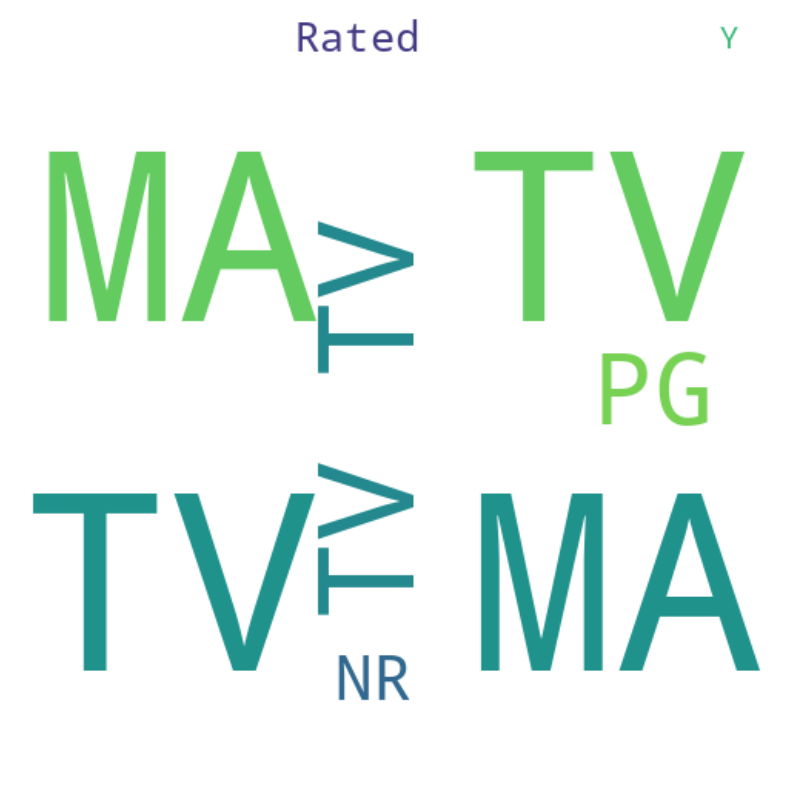

Looking for insights from listed_in in Movies/TV Shows


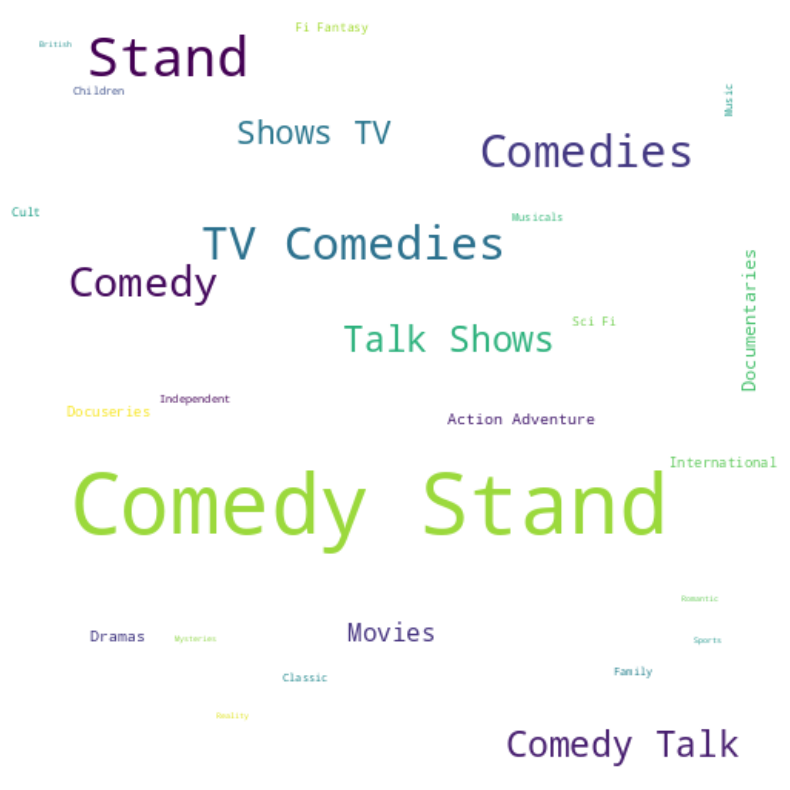

Looking for insights from description in Movies/TV Shows


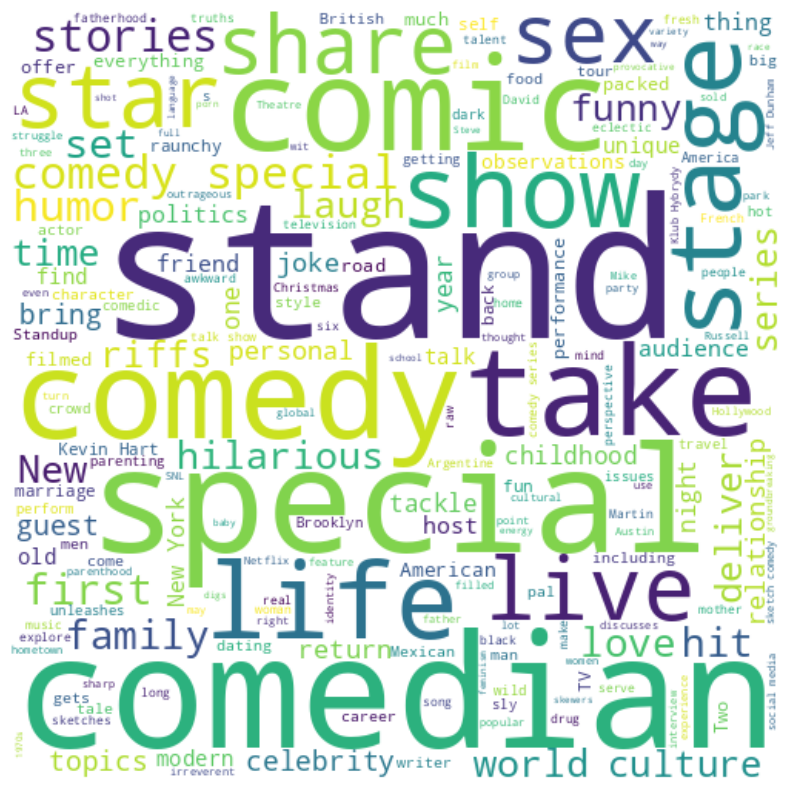

In [ ]:
word_count(9)

# In cluster 9, the word cloud analysis reveals a focus on:

- **Type**: Primarily movies.
- **Title**: No clear dominant titles emerge.
- **Country**: United States is the most prominent production country.
- **Rating**: A mix of ratings, with "TV-MA" being somewhat more frequent.
- **Listed In**: Genres like "Dramas," "Comedies," "International Movies," and "Independent Movies" are prevalent.
- **Description**: Common words include "life," "family," "love," "friend," "new," suggesting themes of personal relationships and experiences.

This cluster seems to represent a collection of mostly American movies with diverse genres and a focus on personal stories.


Exploring Cluster 10
Looking for insights from type in Movies/TV Shows


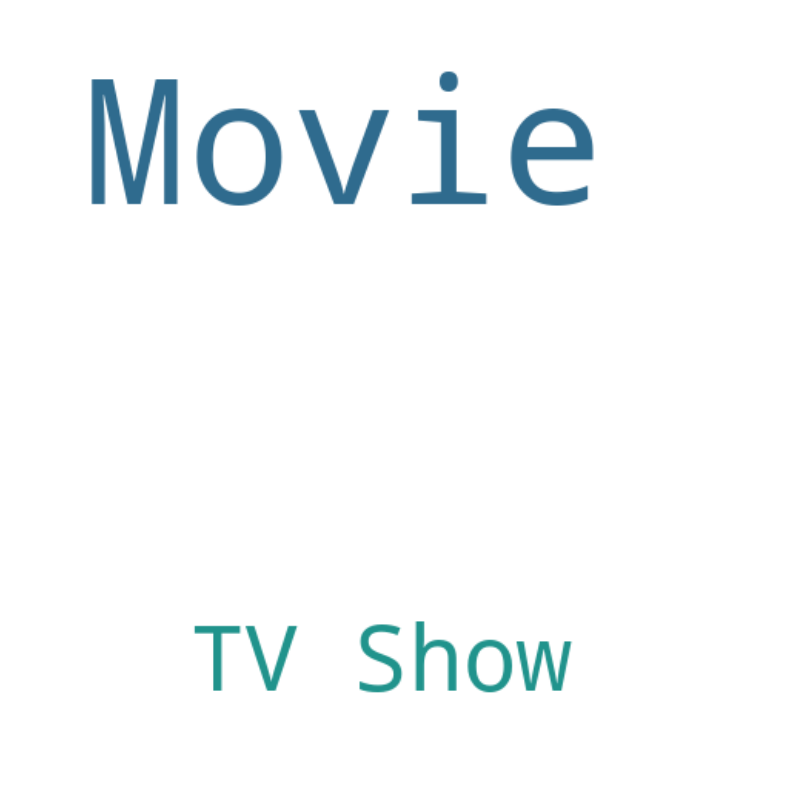

Looking for insights from title in Movies/TV Shows


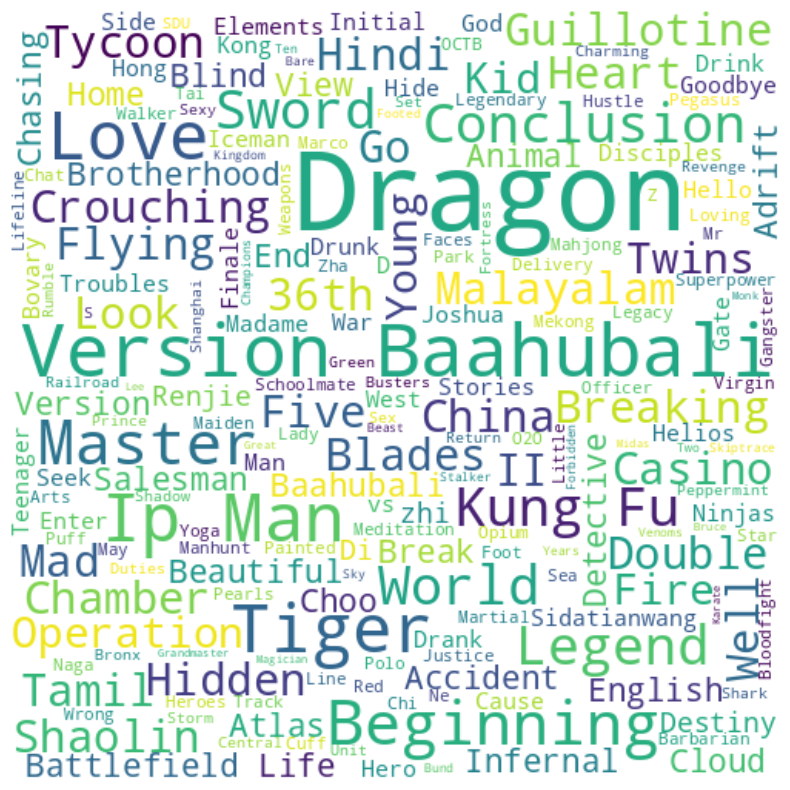

Looking for insights from country in Movies/TV Shows


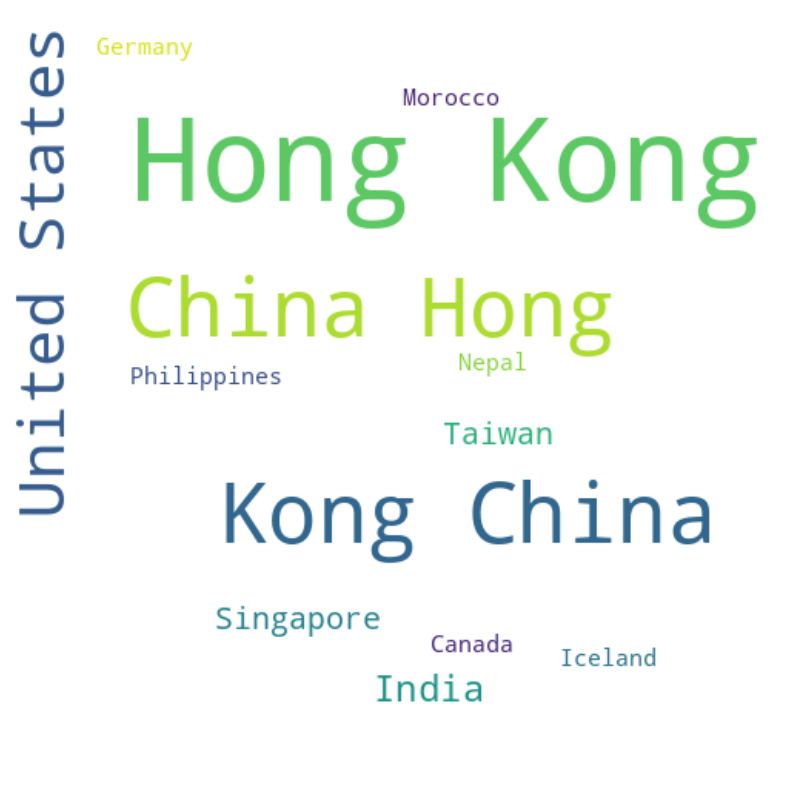

Looking for insights from rating in Movies/TV Shows


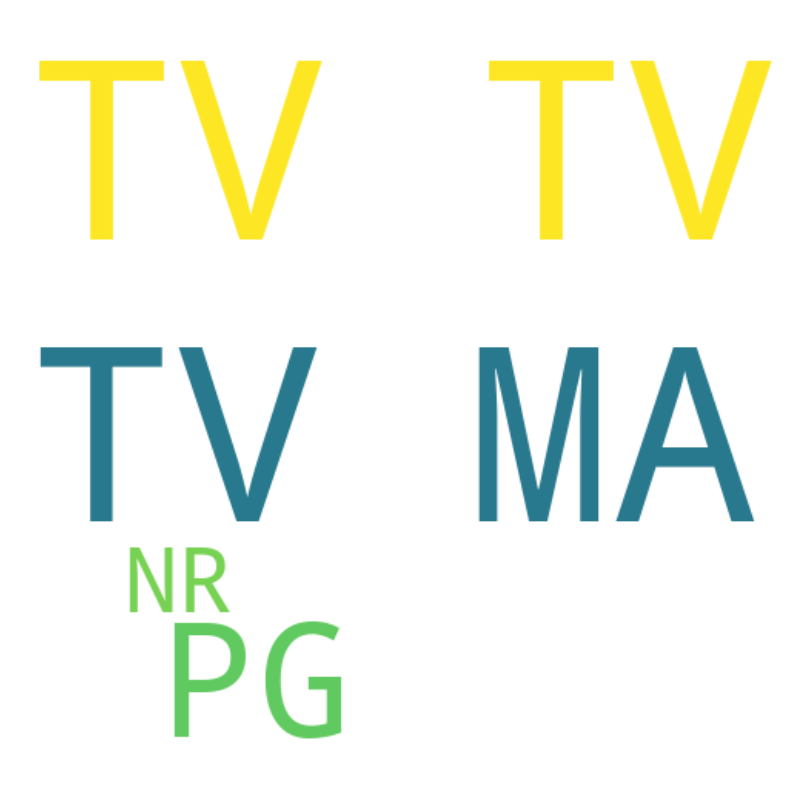

Looking for insights from listed_in in Movies/TV Shows


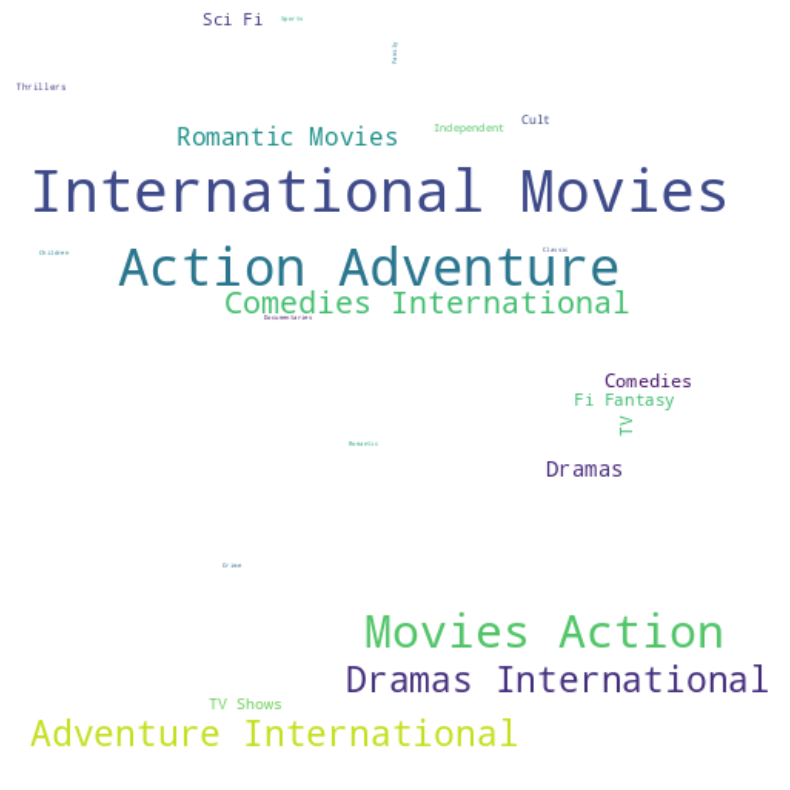

Looking for insights from description in Movies/TV Shows


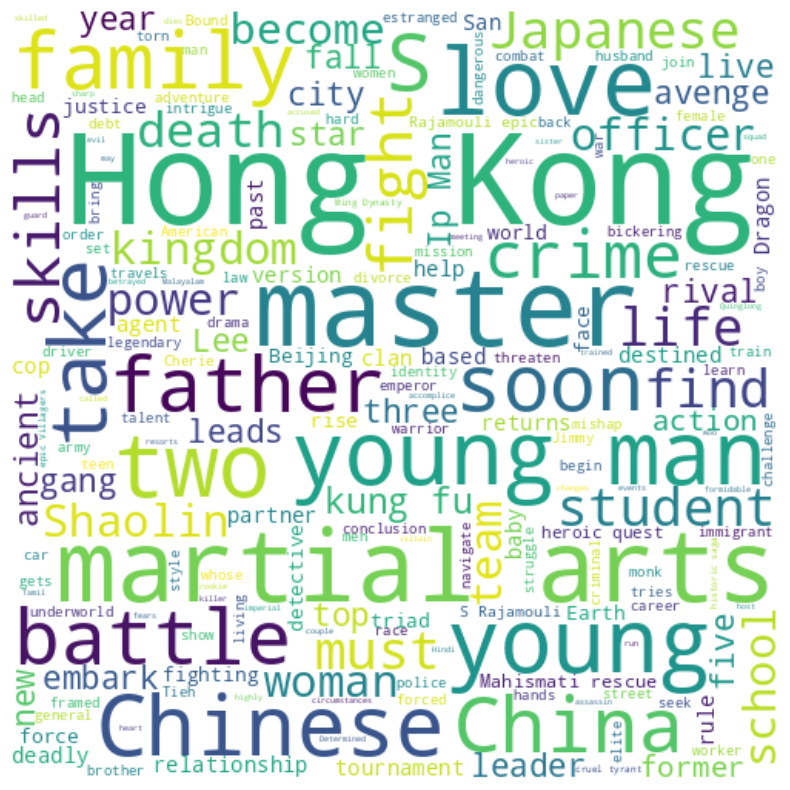

In [ ]:
word_count(10)

# In cluster 10, the word cloud analysis reveals a focus on:

 - **Type**: Primarily movies.
 - **Title**: No dominant titles emerge, suggesting a diverse selection.
 - **Country**: Strong presence of Indian content, particularly Hindi language films.
 - **Rating**: Predominantly TV-MA and TV-14 ratings, indicating mature themes and content.
 - **Listed In**: Genres like International Movies, Dramas, and Comedies are prominent.
 - **Description**: Themes of love, family, relationships, and drama are prevalent.

Overall, cluster 10 appears to represent a collection of primarily Indian movies with mature themes and a focus on drama and relationships.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

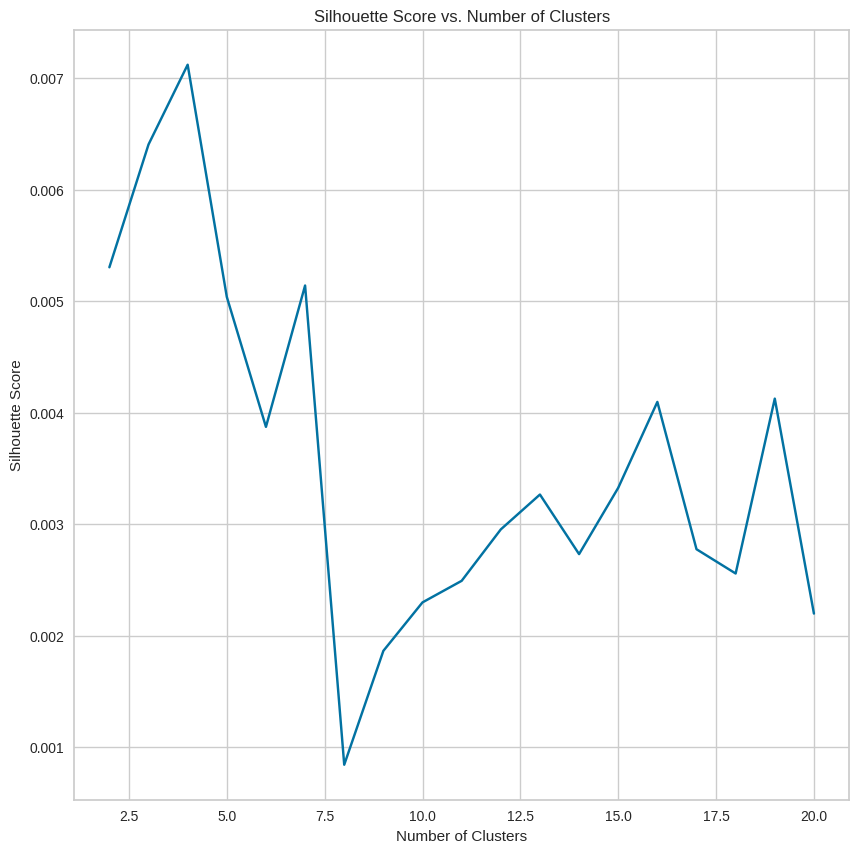

In [ ]:
# The ML model used here is K-Means clustering.

# Evaluation Metric: Silhouette Score
# The silhouette score measures how well-separated the clusters are.
# It ranges from -1 to 1, where:
# - 1 indicates well-separated clusters
# - 0 indicates overlapping clusters
# - -1 indicates that samples might have been assigned to the wrong cluster

# To create an evaluation metric score chart, you would need to calculate the silhouette score for different numbers of clusters and plot them.

# Example code to calculate silhouette scores:
results = {}
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=5)
    labels = kmeans.fit_predict(X_transformed)
    score = silhouette_score(X_transformed, labels)
    results[i] = score

# Plot the silhouette scores
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# Interpretation:
# Based on the silhouette score plot, you can choose the number of clusters that corresponds to the highest score, indicating the best separation of clusters.


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

- No hyperparameter optimization technique is explicitly used in the preceding code.

However, the KElbowVisualizer and Silhouette_score_analysis functions are used to explore the optimal number of clusters,



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

 Future work could include hyperparameter tuning and exploring alternative clustering algorithms.

# **Conclusion**

* This project successfully clustered a Netflix dataset using K-Means.
* Feature engineering and dimensionality reduction (PCA) were applied to optimize the model.
* Silhouette score analysis helped determine the optimal number of clusters.
* Word cloud visualizations provided insights into the characteristics of each cluster.
* This model can be used to personalize recommendations for Netflix users,improving their viewing experience and potentially increasing engagement with the platform.
* By understanding the distinct preferences of each cluster,Netflix can tailor content suggestions and marketing strategies for better user satisfaction.
* This approach contributes to a more personalized and enjoyable streaming experience.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***